# Problem Statement

#### To determine the factors that contribute the an app's success, prediction of an app's success and insights and trends 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

## For model building 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb

In [2]:
# Read data into dataframe
apps_df = pd.read_csv("../data/googleplaystore.csv")
reviews_df = pd.read_csv("../data/googleplaystore_user_reviews.csv")

# Apps Dataset

## Apps Data Description

In [3]:
apps_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
print(apps_df.shape)
print(apps_df.info())

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


## Apps Data Cleaning And Preprocessing

In [5]:
# Converting all values to numeric
print(apps_df["Installs"].unique())
apps_df["Installs"] = (
    pd.to_numeric(
        apps_df["Installs"]
        .str.replace('+', '', regex=False)
        .str.replace(',', '', regex=False),
        errors='coerce'
    )
    .fillna(0)
    .astype(int)
)
print(apps_df["Installs"].dtype)
print(apps_df["Installs"].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
int32
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [6]:
# Converting all values to numeric
print(apps_df["Price"].unique())
print(apps_df["Price"].dtype)
apps_df["Price"] = (
    pd.to_numeric(
    apps_df["Price"]
    .str.replace("$", "", regex= False), 
    errors='coerce')
    .fillna(0)
)
print(apps_df["Price"].unique())
print(apps_df["Price"].dtype)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']
object
[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5  

In [7]:
# Converting all values to megabytes 
def convert_size(size):
    if pd.isna(size):
        return None
    elif size.endswith("M"):
        return float(size.strip("M"))
    elif size.endswith("K"):
        size = round(float(size.strip("k")/1024))
    else:
        return None

print("Possible NaN values: ", apps_df["Size"].value_counts().get("Varies with device", 0))
apps_df["Size"] =  apps_df["Size"].apply(convert_size).rename("Size(MB)")

Possible NaN values:  1695


In [8]:
# change data types
apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"], errors = "coerce")
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

In [9]:
# Dropping missing values
print(pd.isna(apps_df).sum())
apps_df.dropna(subset=["Size", "Rating", "Content Rating", "Current Ver", "Android Ver"], inplace=True)

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
print("\nSize after dropping missing values: ", len(apps_df))

# Dropping duplicates, keeping rows with the most reviews
print("Number of duplicated apps names: ", apps_df.duplicated(subset=['App'], keep=False).sum())
apps_df = apps_df.sort_values('Reviews', ascending=False)
apps_df.drop_duplicates(subset=['App'], inplace=True, keep='first')

#Reset index
apps_df.reset_index(drop= True, inplace= True)


Size after dropping missing values:  7466
Number of duplicated apps names:  1193


## Resulting Apps DataFrame

In [11]:
print(apps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             6768 non-null   object        
 1   Category        6768 non-null   object        
 2   Rating          6768 non-null   float64       
 3   Reviews         6768 non-null   float64       
 4   Size            6768 non-null   float64       
 5   Installs        6768 non-null   int32         
 6   Type            6768 non-null   object        
 7   Price           6768 non-null   float64       
 8   Content Rating  6768 non-null   object        
 9   Genres          6768 non-null   object        
 10  Last Updated    6768 non-null   datetime64[ns]
 11  Current Ver     6768 non-null   object        
 12  Android Ver     6768 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 661.1+ KB
None


In [12]:
apps_df.tail(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6753,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1.0,3.7,10,Paid,1.49,Everyone,Education,2018-05-18,2.0.2,2.1 and up
6754,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40.0,10,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2 and up
6755,NCLEX Multi-topic Nursing Exam Review-Quiz & n...,MEDICAL,5.0,1.0,4.2,10,Free,0.00,Everyone,Medical,2018-07-24,1.0,4.0.3 and up
6756,Basics of Orthopaedics,MEDICAL,5.0,1.0,5.6,10,Free,0.00,Everyone,Medical,2018-07-27,1.0,4.1 and up
6757,Familyfirst Messenger,MEDICAL,4.0,1.0,3.3,10,Free,0.00,Everyone,Medical,2018-07-12,0.1.2,4.4 and up
6758,UK Girls Mobile Numbers,DATING,3.0,1.0,5.5,500,Free,0.00,Mature 17+,Dating,2018-07-19,1.0,4.0.3 and up
6759,FK CLASSIC FOR YOU,BUSINESS,5.0,1.0,3.5,10,Free,0.00,Everyone,Business,2018-02-20,1.1.0,4.0 and up
6760,My CW,TOOLS,3.0,1.0,55.0,100,Free,0.00,Everyone,Tools,2016-10-27,2.35.1,4.1 and up
6761,DH-UFO,FAMILY,5.0,1.0,59.0,100,Free,0.00,Everyone,Entertainment,2018-05-24,1.0.9,4.4 and up
6762,House party - live chat,DATING,1.0,1.0,9.2,10,Free,0.00,Mature 17+,Dating,2018-07-31,3.52,4.0.3 and up


## Exploratory Data Analysis for Apps Dataset

In [13]:
apps_df.nunique()

App               6768
Category            33
Rating              39
Reviews           4229
Size               181
Installs            19
Type                 2
Price               66
Content Rating       6
Genres             111
Last Updated      1164
Current Ver       2473
Android Ver         31
dtype: int64

### Counts of some key features

In [14]:
print(apps_df['Category'].value_counts())

Category
FAMILY                 1518
GAME                    818
TOOLS                   557
LIFESTYLE               261
MEDICAL                 254
FINANCE                 252
PERSONALIZATION         250
SPORTS                  220
BUSINESS                214
PRODUCTIVITY            206
PHOTOGRAPHY             202
HEALTH_AND_FITNESS      188
COMMUNICATION           164
SOCIAL                  154
NEWS_AND_MAGAZINES      152
SHOPPING                140
TRAVEL_AND_LOCAL        140
BOOKS_AND_REFERENCE     138
DATING                  122
VIDEO_PLAYERS           109
MAPS_AND_NAVIGATION      92
EDUCATION                77
FOOD_AND_DRINK           72
AUTO_AND_VEHICLES        62
ENTERTAINMENT            56
ART_AND_DESIGN           56
WEATHER                  49
HOUSE_AND_HOME           49
COMICS                   45
PARENTING                44
BEAUTY                   37
EVENTS                   37
LIBRARIES_AND_DEMO       33
Name: count, dtype: int64


In [15]:
print(apps_df['Content Rating'].value_counts())

Content Rating
Everyone           5431
Teen                773
Mature 17+          303
Everyone 10+        258
Adults only 18+       2
Unrated               1
Name: count, dtype: int64


In [16]:
print(apps_df['Genres'].value_counts().head(20))

Genres
Tools               557
Entertainment       405
Education           382
Action              275
Lifestyle           260
Medical             254
Finance             252
Personalization     250
Sports              226
Business            214
Productivity        206
Photography         202
Health & Fitness    188
Simulation          176
Communication       164
Arcade              158
Social              154
News & Magazines    152
Shopping            140
Travel & Local      139
Name: count, dtype: int64


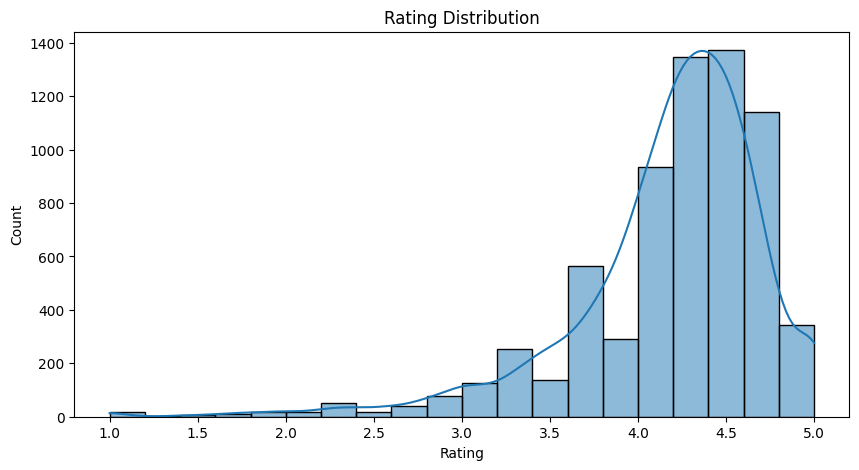

In [17]:
# Distribution of rating
plt.figure(figsize=(10,5))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()

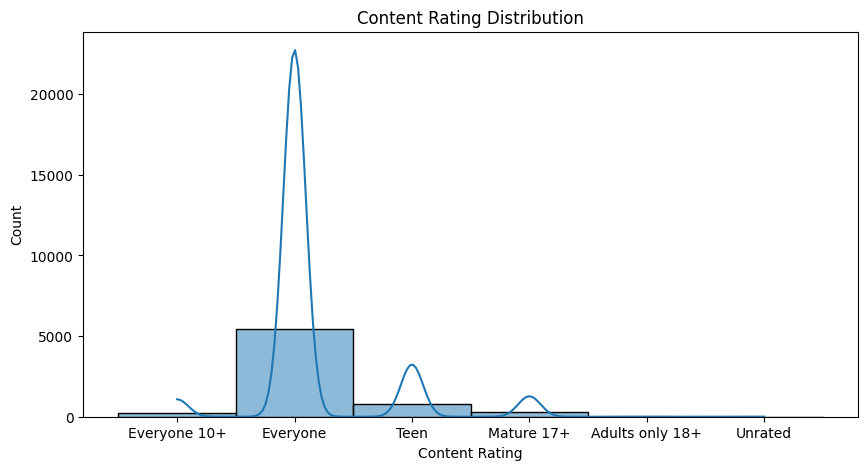

In [18]:
# Distribution of Content Rating
plt.figure(figsize=(10,5))
sns.histplot(apps_df['Content Rating'], kde=True, bins=20)
plt.title('Content Rating Distribution')
plt.show()

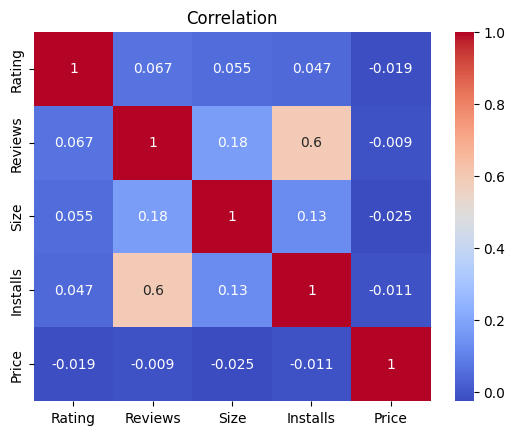

In [19]:
# Correlation Analysis
corr = apps_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

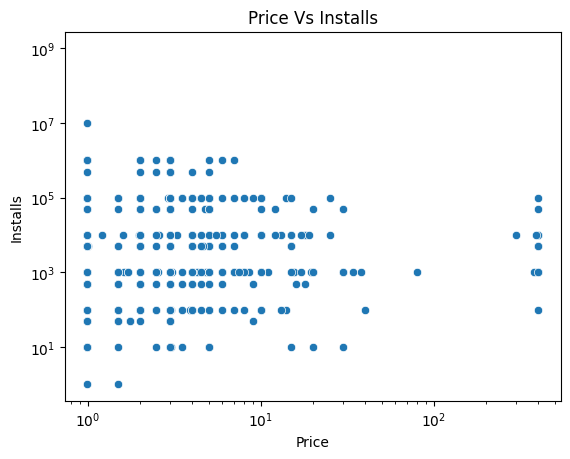

In [20]:
# Price VS Installs
sns.scatterplot(data=apps_df, x='Price', y="Installs")
plt.xscale('log')
plt.yscale('log')
plt.title('Price Vs Installs')
plt.show()

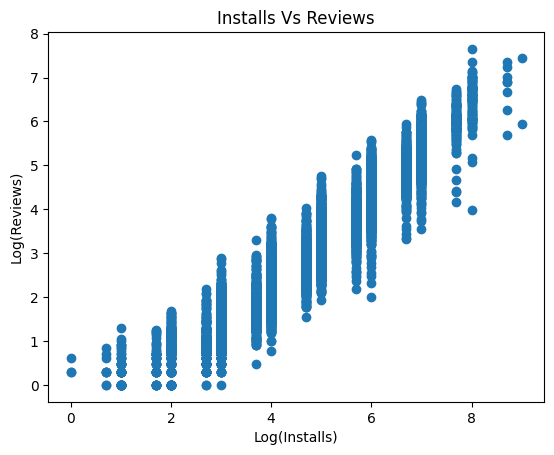

In [21]:
plt.scatter(np.log10(apps_df['Installs']), np.log10(apps_df['Reviews']))
#sns.scatterplot(data=apps_df, x='Installs', y='Reviews')
plt.xlabel('Log(Installs)')
plt.ylabel('Log(Reviews)')
plt.title('Installs Vs Reviews')
plt.show()

### App category vs price

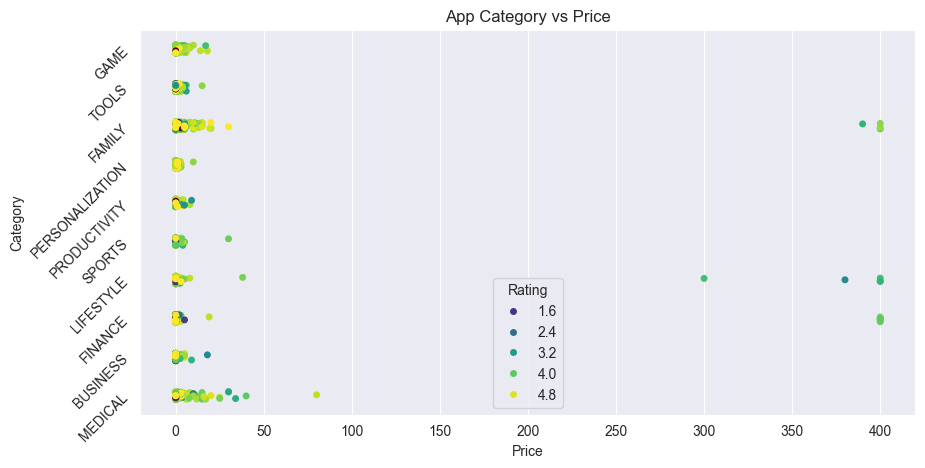

In [22]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
pop_cat = apps_df['Category'].value_counts().nlargest(10).index
pop_cat_df = apps_df[apps_df.Category.isin(pop_cat)]
sns.stripplot(data=pop_cat_df, x='Price', y='Category', jitter=True, hue='Rating', palette='viridis')
plt.yticks(rotation = 45)
plt.title('App Category vs Price')
plt.show()

### Paid Vs Free Apps

Text(0.5, 1.0, 'Distribution of Types')

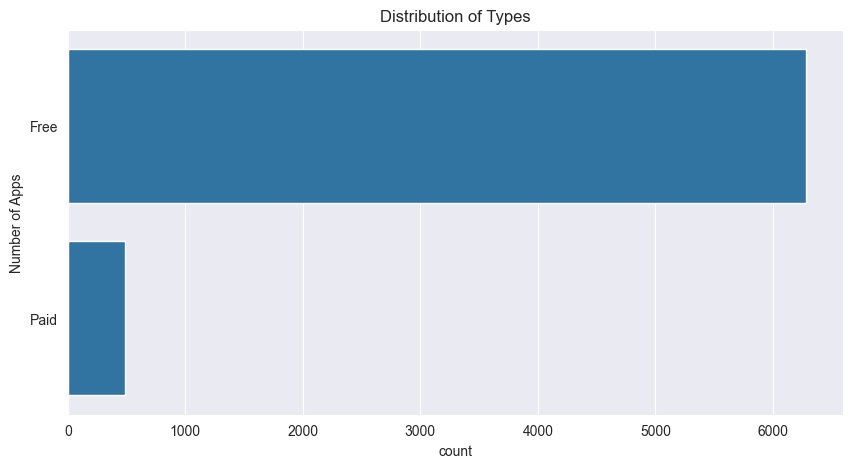

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=apps_df['Type'])
plt.ylabel('Number of Apps')
plt.title('Distribution of Types')

## Content Rating Vs Installs

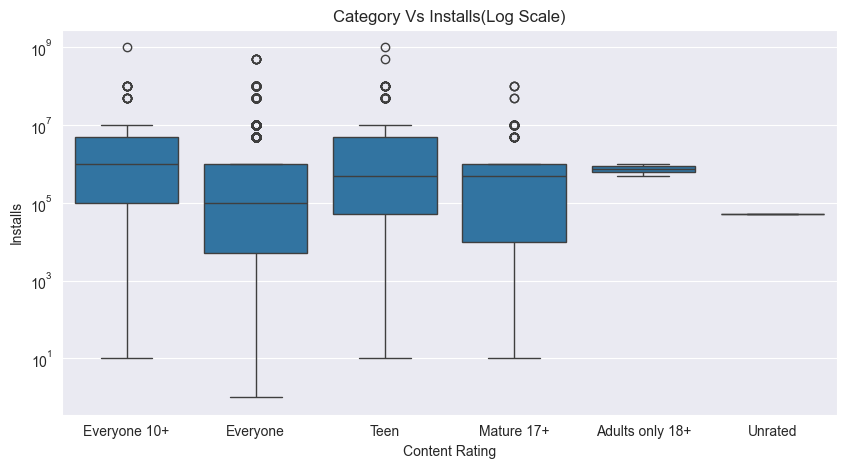

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=apps_df['Content Rating'], y=apps_df['Installs'])
plt.yscale('log')
plt.title('Category Vs Installs(Log Scale)')
plt.show()

## Feature Engineering For Apps

### Extract Year from Last Updated coulumn

In [25]:
apps_df['Last Updated Year'] = apps_df['Last Updated'].dt.year
print(apps_df['Last Updated Year'].head())
apps_df['App_age(Days)'] = (pd.Timestamp.now() - apps_df['Last Updated']).dt.days 
print(apps_df['App_age(Days)'].head())

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Last Updated Year, dtype: int32
0    2468
1    2471
2    2486
3    2478
4    2450
Name: App_age(Days), dtype: int64


### Defining a Success Matric

In [26]:
apps_df['Success_score'] = (apps_df['Installs'] * apps_df['Rating']).fillna(0).astype('int64')
print("\nHighest Scores: ", apps_df['Success_score'].nlargest())
print("\nLowest Scores: ", apps_df['Success_score'].nsmallest())
apps_df[apps_df['Success_score'] <= 60].head(15)


Highest Scores:  1      4500000000
204    3900000000
21     2300000000
4      2250000000
3      2200000000
Name: Success_score, dtype: int64

Lowest Scores:  6545     5
6636     5
6677     5
6660     7
6741    10
Name: Success_score, dtype: int64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,App_age(Days),Success_score
5864,DN Blog,SOCIAL,5.0,20.0,4.2,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up,2018,2460,50
6147,Trovami se ci riesci,GAME,5.0,11.0,6.1,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up,2017,2959,50
6173,Revita.bg,HEALTH_AND_FITNESS,4.8,10.0,4.0,10,Free,0.00,Everyone,Health & Fitness,2018-06-13,3.55,4.0 and up,2018,2500,48
6253,BV Taxi Sudan,MAPS_AND_NAVIGATION,3.5,8.0,26.0,10,Free,0.00,Everyone,Maps & Navigation,2018-01-17,1.2.20180117,4.1 and up,2018,2647,35
6268,211:CK,GAME,5.0,8.0,38.0,10,Paid,0.99,Teen,Arcade,2018-04-11,1.3,4.1 and up,2018,2563,50
6288,CG Jobs,FAMILY,5.0,8.0,14.0,10,Free,0.00,Everyone,Education,2018-08-01,1.1,4.2 and up,2018,2451,50
6314,Chronolink DX,FAMILY,5.0,7.0,73.0,10,Paid,0.99,Everyone,Puzzle,2017-07-06,1.2,4.1 and up,2017,2842,50
6317,Brick Breaker BR,GAME,5.0,7.0,19.0,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up,2018,2460,25
6352,BU Study,FAMILY,5.0,7.0,5.6,10,Free,0.00,Everyone,Education,2017-12-07,1.0,4.0.3 and up,2017,2688,50
6379,Best Browser BD social networking,COMMUNICATION,4.8,6.0,21.0,10,Free,0.00,Everyone,Communication,2018-07-04,2.0,4.1 and up,2018,2479,48


## Visualizing the Skew of Success Scores

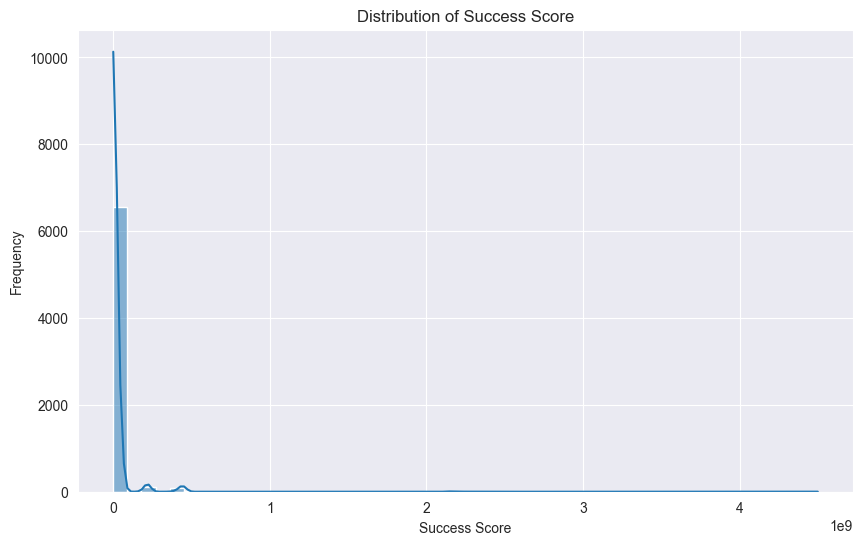

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Success_score'], bins=50, kde=True)

plt.title('Distribution of Success Score')
plt.xlabel('Success Score')
plt.ylabel('Frequency')
plt.show()

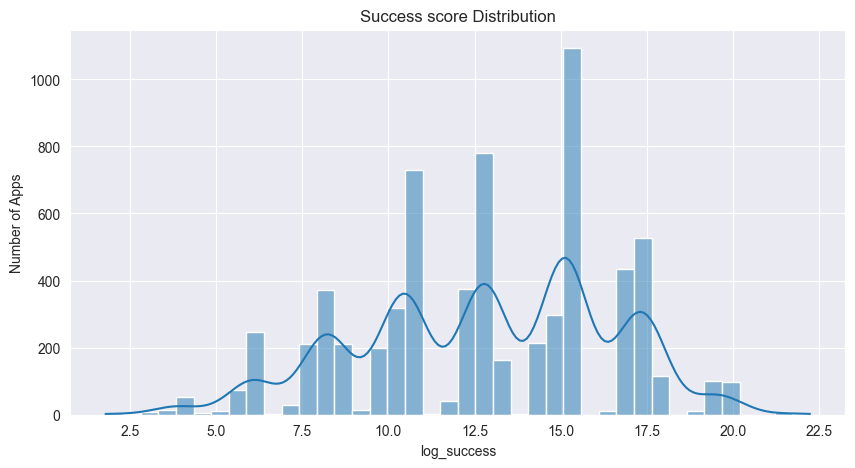

'\nlog_success Value:\tInterpretation\n0 to 5:\tLow success (few installs or low rating)\n5 to 10:\tModerate success\n10 to 15:\tHigh success\n15+:\tVery high success (top apps with huge installs and great ratings)\n'

In [28]:
apps_df['log_success'] = np.log1p(apps_df['Success_score'])

plt.figure(figsize=(10,5))
sns.histplot(apps_df['log_success'], bins='auto', kde=True)
plt.title('Success score Distribution')
plt.ylabel('Number of Apps')
plt.show()

# interpration
'''
log_success Value:	Interpretation
0 to 5:	Low success (few installs or low rating)
5 to 10:	Moderate success
10 to 15:	High success
15+:	Very high success (top apps with huge installs and great ratings)
'''

### Categories with High Success

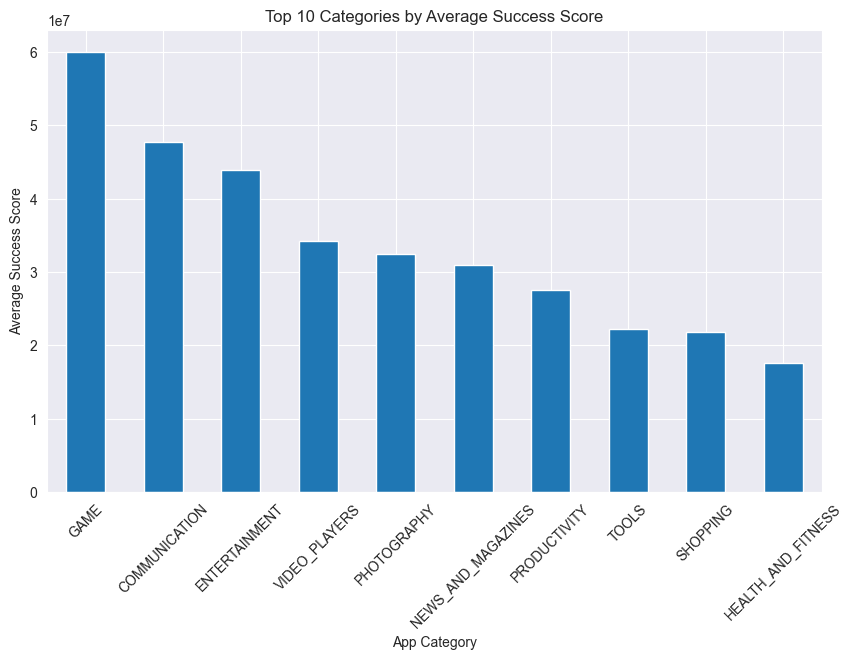

In [29]:
# Group by category and calculate average success score
category_avg_success = apps_df.groupby('Category')['Success_score'].mean().sort_values(ascending=False)

# Plot top 10 categories
category_avg_success.head(10).plot(kind='bar', figsize=(10, 6))

plt.title(f'Top 10 Categories by Average Success Score')
plt.ylabel('Average Success Score')
plt.xlabel('App Category')
plt.xticks(rotation=45)
plt.show()

### Top Peforming Apps By Success Score

C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\269096790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Success_score', y='App', data=top_apps, palette='viridis')


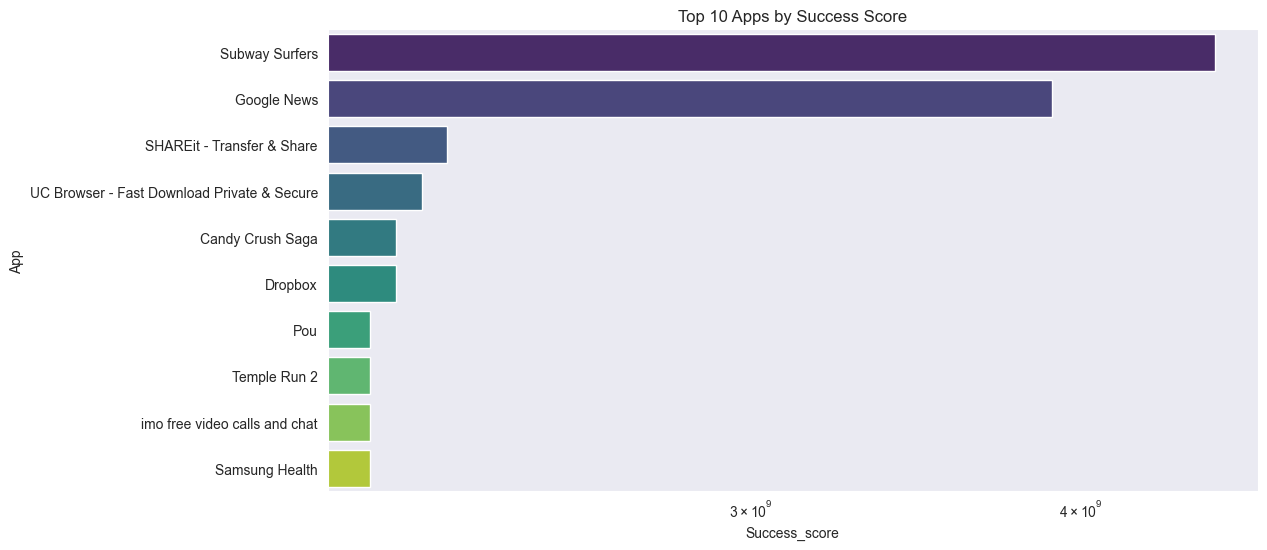

In [30]:
top_apps = apps_df.nlargest(10, 'Success_score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Success_score', y='App', data=top_apps, palette='viridis')
plt.xscale('log')
plt.title('Top 10 Apps by Success Score')
plt.show()


### Poor Performing Apps by Success Score

C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\916774918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Success_score', y='App', data=top_apps, palette='viridis')


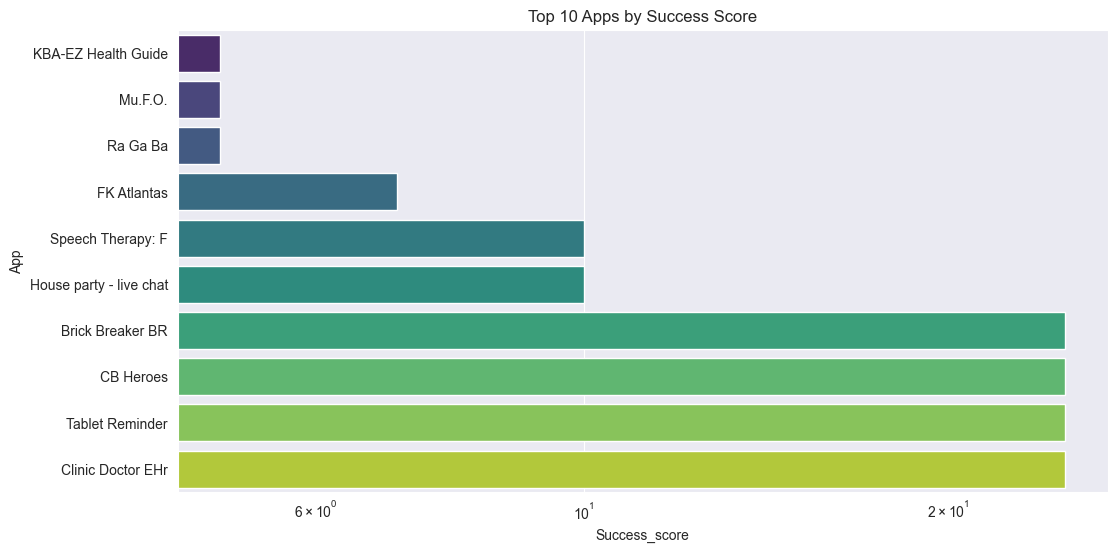

In [31]:
top_apps = apps_df.nsmallest(10, 'Success_score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Success_score', y='App', data=top_apps, palette='viridis')
plt.xscale('log')
plt.title('Top 10 Apps by Success Score')
plt.show()


### Encoding content rating (to allow for checking feature importance using correlation)

In [32]:
content_rating_map = {
    'Unrated': 0, 
    'Everyone': 1, 
    'Everyone 10+': 2,
    'Teen': 3,
    'Mature 17+': 4,
    'Adults only 18+': 5
}

apps_df['Content_Rating_Encoded'] = apps_df['Content Rating'].map(content_rating_map)
apps_df[['Content_Rating_Encoded', 'Content Rating']].tail(10)

,Content_Rating_Encoded,Content Rating
6758,4,Mature 17+
6759,1,Everyone
6760,1,Everyone
6761,1,Everyone
6762,4,Mature 17+
6763,1,Everyone
6764,1,Everyone
6765,1,Everyone
6766,4,Mature 17+
6767,1,Everyone


### Extracting Features from Genres

In [33]:
apps_df['Primary Genre'] = apps_df['Genres'].str.split(';').str[0]
apps_df['Secondary Genre'] = apps_df['Genres'].str.split(';').str[1].fillna('None')
print(apps_df['Secondary Genre'].value_counts())
apps_df.head(10)

Secondary Genre
None                  6434
Action & Adventure      84
Education               79
Pretend Play            65
Brain Games             56
Creativity              27
Music & Video           23
Name: count, dtype: int64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,App_age(Days),Success_score,log_success,Content_Rating_Encoded,Primary Genre,Secondary Genre
0,Clash of Clans,GAME,4.6,44893888.0,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,2018,2468,459999999,19.946737,2,Strategy,None
1,Subway Surfers,GAME,4.5,27725352.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,2018,2471,4500000000,22.227343,2,Arcade,None
2,Clash Royale,GAME,4.6,23136735.0,97.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up,2018,2486,459999999,19.946737,2,Strategy,None
3,Candy Crush Saga,GAME,4.4,22430188.0,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,2018,2478,2200000000,21.511723,1,Casual,None
4,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850.0,40.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,2018,2450,2250000000,21.534196,3,Communication,None
5,8 Ball Pool,GAME,4.5,14201891.0,52.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up,2018,2452,450000000,19.924758,1,Sports,None
6,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633.0,14.0,100000000,Free,0.0,Everyone,Tools,2018-06-05,4.8.7.8,4.0 and up,2018,2508,450000000,19.924758,1,Tools,None
7,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815.0,15.0,100000000,Free,0.0,Everyone,Tools,2018-07-25,3.1.2,4.0 and up,2018,2458,450000000,19.924758,1,Tools,None
8,Shadow Fight 2,GAME,4.6,10981850.0,88.0,100000000,Free,0.0,Everyone 10+,Action,2018-07-02,1.9.38,3.0 and up,2018,2481,459999999,19.946737,2,Action,None
9,Pou,GAME,4.3,10486018.0,24.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up,2018,2519,2150000000,21.488734,1,Casual,None


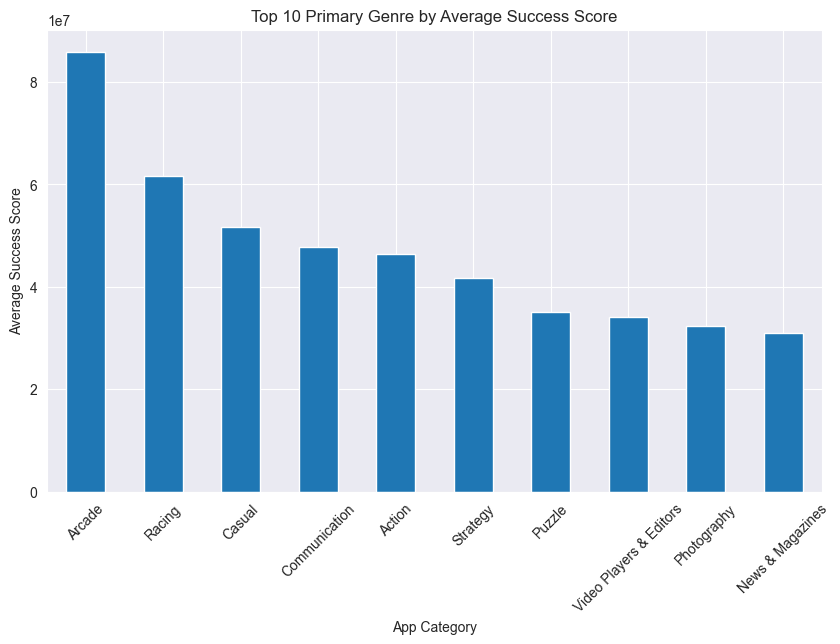

In [34]:
# Group by category and calculate average success score
genre_avg_success = apps_df.groupby('Primary Genre')['Success_score'].mean().sort_values(ascending=False)

# Plot top 10 categories
genre_avg_success.head(10).plot(kind='bar', figsize=(10, 6))

plt.title('Top 10 Primary Genre by Average Success Score')
plt.ylabel('Average Success Score')
plt.xlabel('App Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\3262199982.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = apps_df.groupby('App_Age_Bin')['Success_score'].mean().reset_index()


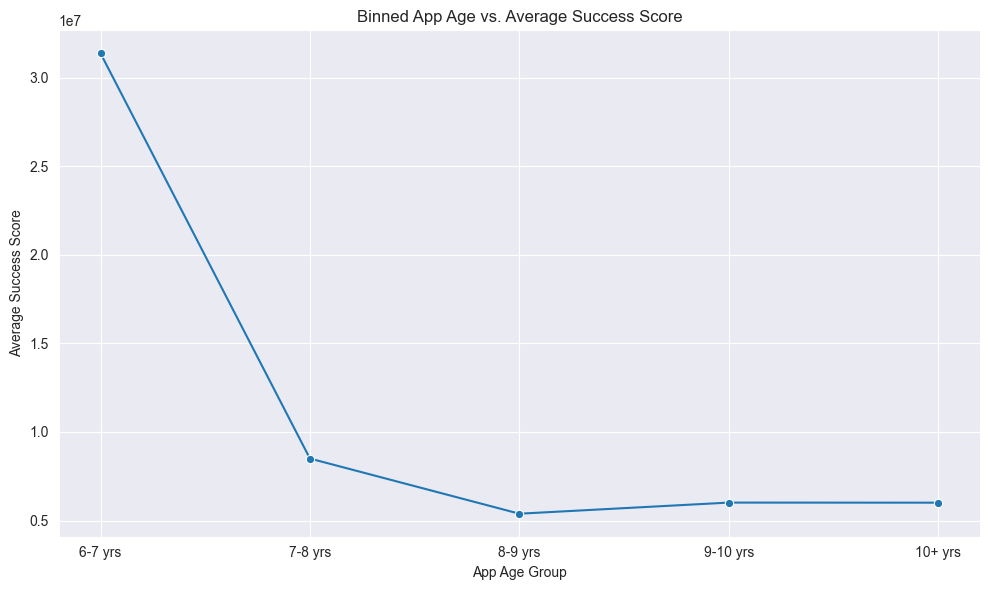

In [36]:
# Lineplot for App Age vs Success Score
# Create age bins (you can adjust the bin edges as needed)
apps_df['App_Age_Bin'] = pd.cut(apps_df['App_age(Days)'], 
                                bins = [0, 365, 730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650, float('inf')],
                                labels = ['<1 yr', '1-2 yrs', '2-3 yrs', '3-4 yrs', '4-5 yrs', '5-6 yrs', '6-7 yrs',
                                          '7-8 yrs', '8-9 yrs', '9-10 yrs', '10+ yrs'])

# Group by binned age and calculate mean success score
binned_data = apps_df.groupby('App_Age_Bin')['Success_score'].mean().reset_index()

# Lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=binned_data, x='App_Age_Bin', y='Success_score', marker='o')
plt.title('Binned App Age vs. Average Success Score')
plt.xlabel('App Age Group')
plt.ylabel('Average Success Score')
plt.grid(True)
plt.tight_layout()
plt.show()

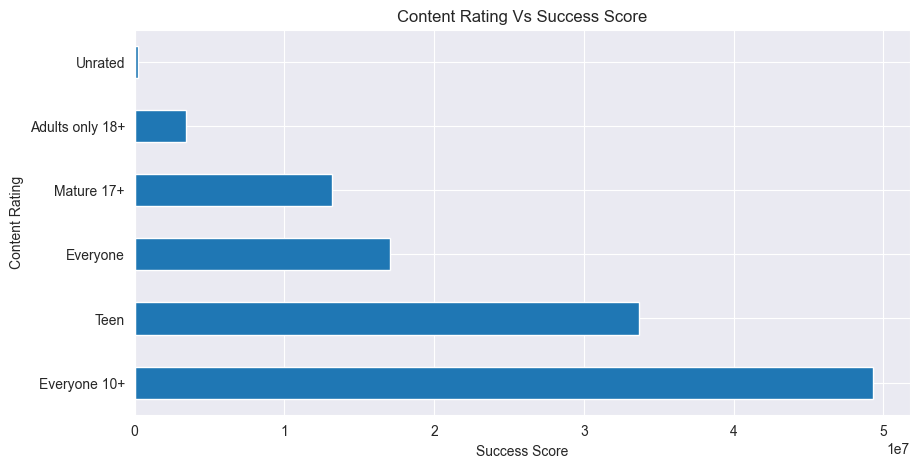

In [37]:
content_rating_grouped = apps_df.groupby('Content Rating')['Success_score'].mean().sort_values(ascending=False)

content_rating_grouped.plot(kind='barh', figsize=(10,5))
plt.title('Content Rating Vs Success Score')
plt.xlabel('Success Score')
plt.show()

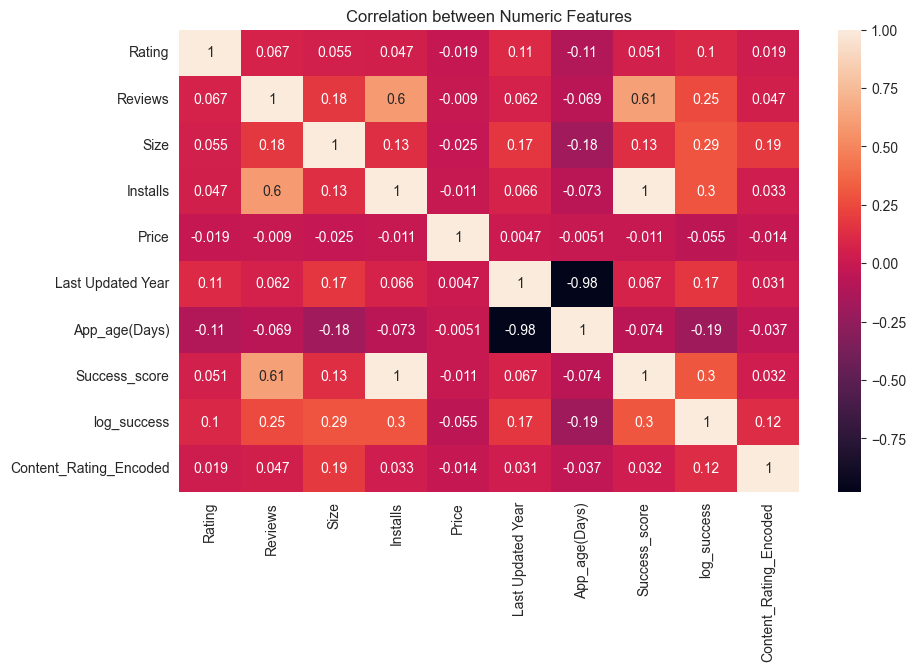

In [38]:
plt.figure(figsize=(10,6))
corr = apps_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation between Numeric Features')
plt.show()

# Reviews Dataset

### Reviews Data Description

In [39]:
reviews_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [40]:
print(reviews_df.shape)
print(reviews_df.info())

(64295, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


### Reviews Data Cleaning And Preprocessing

In [41]:
# Dropping null values
print(pd.isna(reviews_df).sum())
reviews_df.dropna(subset=["Translated_Review", "Sentiment_Subjectivity", "Sentiment_Polarity", "Sentiment"], inplace = True)

# Dropping Duplicates
print("\nSize of dataframe after dropping null values: ",len(reviews_df))
print("\nUnique Translated Reviews Count: ", len(reviews_df["Translated_Review"].unique()))
reviews_df.drop_duplicates(subset=["Translated_Review"], inplace=True)

# Reset index
reviews_df.reset_index(drop=True, inplace=True)

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Size of dataframe after dropping null values:  37427

Unique Translated Reviews Count:  27994


### Resulting Reviews DataFrame

In [42]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27994 entries, 0 to 27993
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     27994 non-null  object 
 1   Translated_Review       27994 non-null  object 
 2   Sentiment               27994 non-null  object 
 3   Sentiment_Polarity      27994 non-null  float64
 4   Sentiment_Subjectivity  27994 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [43]:
reviews_df.tail(15)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27979,Housing-Real Estate & Property,Filters work... Searching property useless,Negative,-0.500000,0.200000
27980,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.000000,0.000000
27981,Housing-Real Estate & Property,Awesome app.. But prices date? Awesome app. Gi...,Positive,0.509375,0.511458
27982,Housing-Real Estate & Property,This worse ever. They give graphic pictures pr...,Negative,-0.081250,0.418750
27983,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
27984,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
27985,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
27986,Housing-Real Estate & Property,What nonsensical app.. doesn't owner postings ...,Neutral,0.000000,0.000000
27987,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
27988,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470


## Exploratory Data Analysis For Reviews Dataset

In [44]:
reviews_df.nunique()

App                         863
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

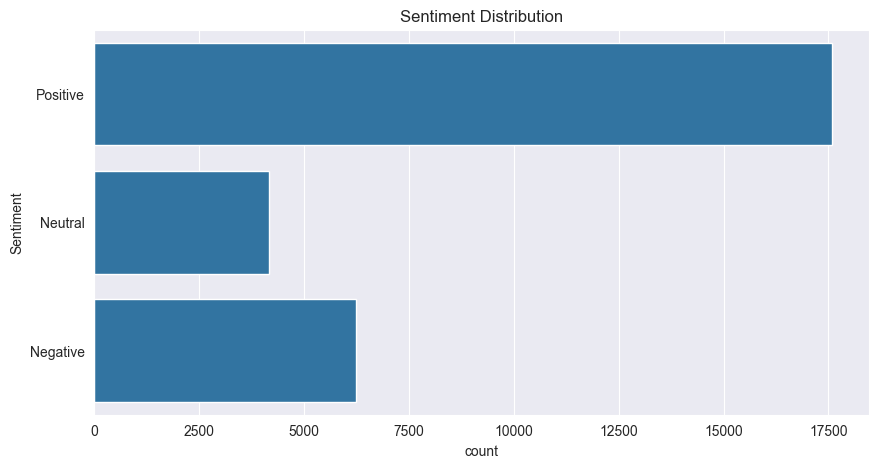

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(reviews_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.show()

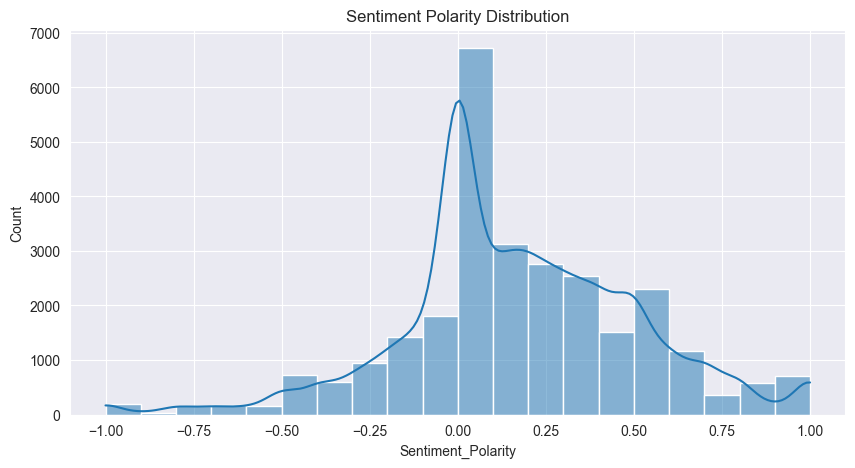

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(reviews_df['Sentiment_Polarity'], kde=True, bins=20)
plt.title('Sentiment Polarity Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

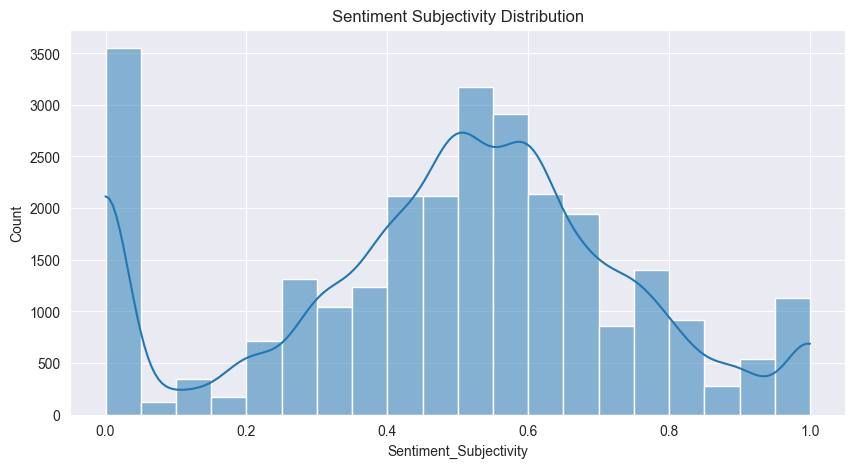

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(reviews_df['Sentiment_Subjectivity'], kde=True, bins=20)
plt.title('Sentiment Subjectivity Distribution')
plt.show

### Apps Pertaining to their sentiments

In [48]:
grouped = reviews_df.groupby(by='App')
sentiment_counts = pd.DataFrame(grouped['Sentiment'].value_counts()).reset_index()
sentiment_counts.columns = ['App', 'Sentiment', 'count']

                                 App Sentiment  count
1044         ColorNote Notepad Notes  Positive     91
896         Calorie Counter - Macros  Positive     87
61      8fit Workouts & Meal Planner  Positive     82
902     Calorie Counter - MyNetDiary  Positive     81
0              10 Best Foods for You  Positive     79
2077                   Google Photos  Positive     76
890   Calorie Counter & Diet Tracker  Positive     75
1595    Family Locator - GPS Tracker  Positive     75
637                            Bible  Positive     74
1463     Episode - Choose Your Story  Positive     73


C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\3763725403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='App', data=top_positive_apps, palette='viridis')


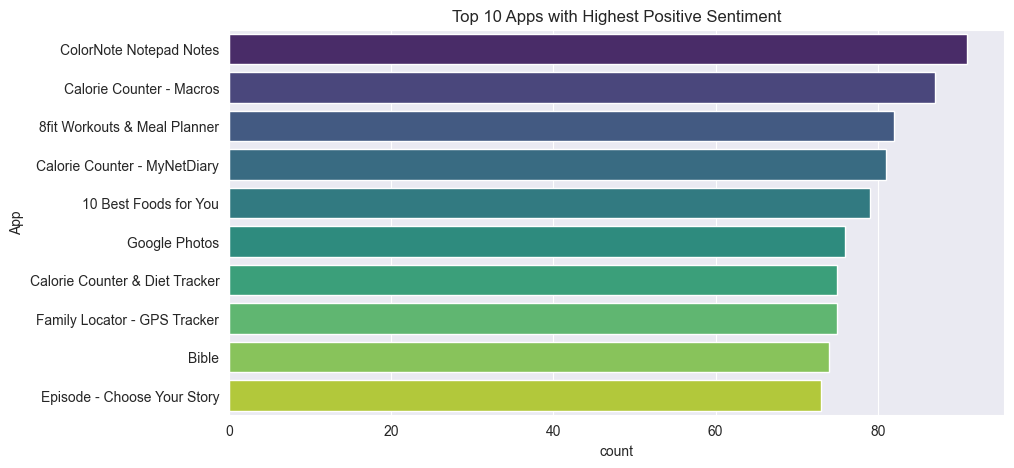

In [49]:
plt.figure(figsize=(10,5))
positive = sentiment_counts[sentiment_counts['Sentiment'] == 'Positive']
top_positive_apps = positive.nlargest(10, 'count')
print(top_positive_apps)
sns.barplot(x='count', y='App', data=top_positive_apps, palette='viridis')
plt.title('Top 10 Apps with Highest Positive Sentiment')
plt.show()

                                                    App Sentiment  count
622   BestCam Selfie-selfie, beauty camera, photo ed...   Neutral     30
410                                                Azar   Neutral     27
1639                                    Fast Secure VPN   Neutral     23
1406                        Easy Installer - Apps On SD   Neutral     21
1037           Color by Number - Draw Sandbox Pixel Art   Neutral     19
171                                     AdWords Express   Neutral     18
1561                                           Facebook   Neutral     18
78                                            A+ Mobile   Neutral     17
274                                       Amazon Kindle   Neutral     17
693                            Blood Pressure(BP) Diary   Neutral     17


C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\2698480850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='App', data=top_neutral_apps, palette='viridis')


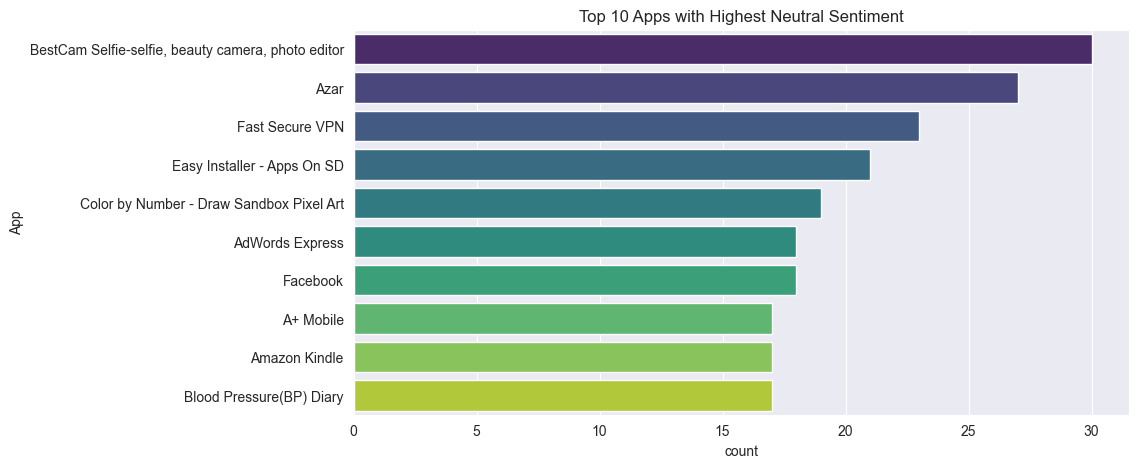

In [50]:
plt.figure(figsize=(10,5))
neutral = sentiment_counts[sentiment_counts['Sentiment'] == 'Neutral']
top_neutral_apps = neutral.nlargest(10, 'count')
print(top_neutral_apps)
sns.barplot(x='count', y='App', data=top_neutral_apps, palette='viridis')
plt.title('Top 10 Apps with Highest Neutral Sentiment')
plt.show()

                        App Sentiment  count
311     Angry Birds Classic  Negative     59
585     Be A Legend: Soccer  Negative     59
1559               Facebook  Negative     59
1092          Cooking Fever  Negative     57
919   Candy Crush Soda Saga  Negative     50
1969           Gardenscapes  Negative     50
57              8 Ball Pool  Negative     46
189                 Agar.io  Negative     44
577        Basketball Stars  Negative     41
671            Block Puzzle  Negative     40


C:\Users\daisy\AppData\Local\Temp\ipykernel_21668\1338393242.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='App', data=top_negative_apps, palette='viridis')


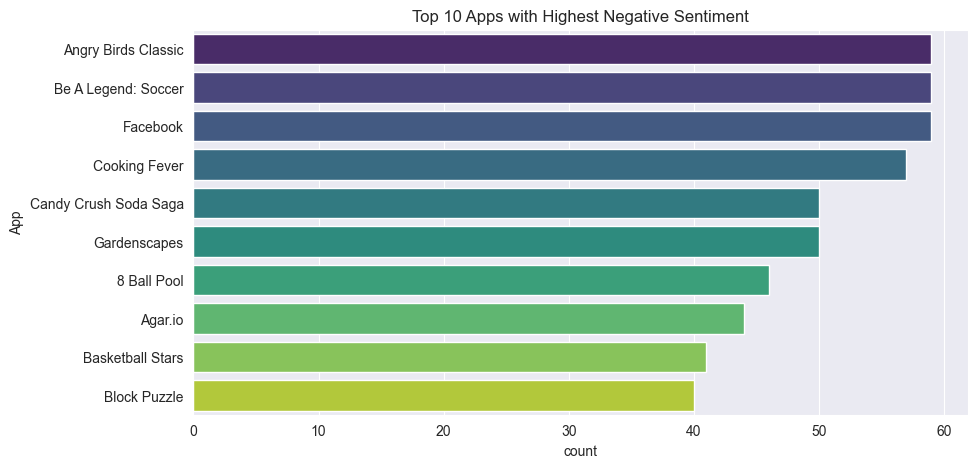

In [51]:
plt.figure(figsize=(10,5))
negative = sentiment_counts[sentiment_counts['Sentiment'] == 'Negative']
top_negative_apps = negative.nlargest(10, 'count')
print(top_negative_apps)
sns.barplot(x='count', y='App', data=top_negative_apps, palette='viridis')
plt.title('Top 10 Apps with Highest Negative Sentiment')
plt.show()

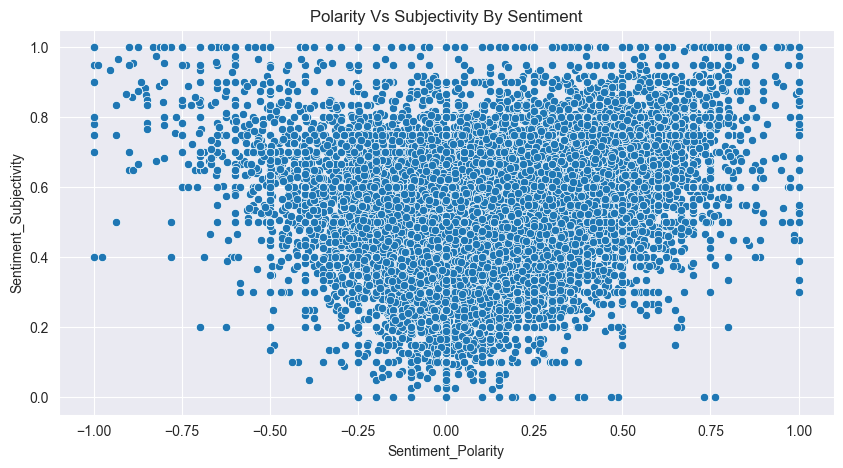


Correlation:                         Sentiment_Polarity  Sentiment_Subjectivity
Sentiment_Polarity                1.000000                0.237168
Sentiment_Subjectivity            0.237168                1.000000


In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=reviews_df, x='Sentiment_Polarity', y='Sentiment_Subjectivity')
plt.title('Polarity Vs Subjectivity By Sentiment')
plt.show()

print('\nCorrelation:',reviews_df.corr(numeric_only=True))

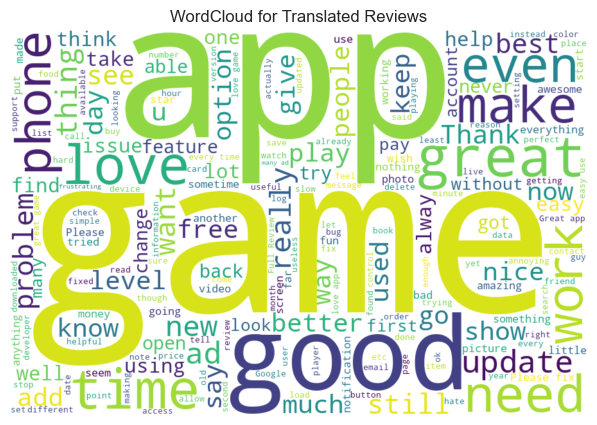

In [53]:
text = ' '.join(review for review in reviews_df['Translated_Review'])
wordcloud = WordCloud(width=900, height=600, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Translated Reviews')
plt.show()

## Feature Engineering For Reviews

### Word and Charater count

In [54]:
reviews_df['Review_Length'] = reviews_df['Translated_Review'].astype(str).apply(len)
reviews_df['Word_Count'] = reviews_df['Translated_Review'].astype(str).apply(lambda x: len(x.split()))
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_Length,Word_Count
27989,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,122,22
27990,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,204,29
27991,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,88,15
27992,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,88,15
27993,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,122,19


### Encoding Sentiment Column 

In [55]:
sentiment_map = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

reviews_df['Sentiment_Encoded'] = reviews_df['Sentiment'].map(sentiment_map)
reviews_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_Length,Word_Count,Sentiment_Encoded
27984,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000,155,25,-1
27985,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000,92,17,1
27986,Housing-Real Estate & Property,What nonsensical app.. doesn't owner postings ...,Neutral,0.000000,0.000000,117,17,0
27987,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333,178,26,-1
27988,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470,86,13,1
27989,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,122,22,1
27990,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,204,29,1
27991,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,88,15,-1
27992,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,88,15,1
27993,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,122,19,-1


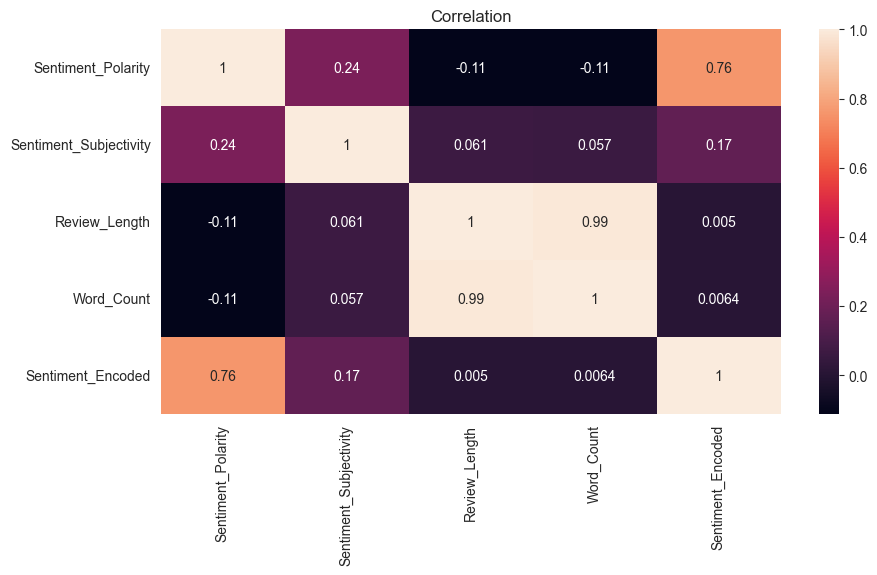

In [56]:
plt.figure(figsize=(10,5))
corr = reviews_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation')
plt.show()

### Aggregating Reviews by Apps

In [57]:
reviews_summary = reviews_df.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Encoded': ['mean', 'sum'], 
    'Sentiment_Subjectivity': 'mean',
    'Word_Count': 'mean',
    'Review_Length': 'mean'  
}).reset_index()

reviews_summary.columns= ['App', 'Sentiment_Polarity', 'Avg_Sentiment_Encoded', 'Net_Sentiment_Encoded', 'Sentiment_Subjectivity', 'Word_Count', 'Review_Length']
reviews_summary.tail(10)

,App,Sentiment_Polarity,Avg_Sentiment_Encoded,Net_Sentiment_Encoded,Sentiment_Subjectivity,Word_Count,Review_Length
853,Horses Live Wallpaper,0.284487,0.551724,16,0.466615,5.344828,32.379310
854,Hostelworld: Hostels & Cheap Hotels Travel App,0.277340,0.513514,19,0.578817,10.108108,66.270270
855,Hot Wheels: Race Off,-0.008839,0.400000,8,0.490315,19.500000,115.750000
856,HotelTonight: Book amazing deals at great hotels,0.309005,0.607143,51,0.554421,12.321429,78.190476
857,Hotels Combined - Cheap deals,0.143274,0.172414,5,0.324537,12.344828,75.862069
858,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.256410,10,0.525508,23.769231,148.256410
859,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.085000,0.200000,4,0.266250,4.250000,24.900000
860,Hotstar,0.007390,-0.033333,-1,0.516895,26.433333,173.000000
861,Hotwire Hotel & Car Rental App,0.147483,0.258065,8,0.440990,14.419355,89.032258
862,Housing-Real Estate & Property,-0.057498,-0.150000,-3,0.367458,19.350000,124.000000


## Joining Apps & Reviews DataFrames 

In [58]:
df = apps_df.merge(reviews_summary, on='App', how='left')
pd.isna(df).sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Last Updated Year            0
App_age(Days)                0
Success_score                0
log_success                  0
Content_Rating_Encoded       0
Primary Genre                0
Secondary Genre              0
App_Age_Bin                  0
Sentiment_Polarity        6208
Avg_Sentiment_Encoded     6208
Net_Sentiment_Encoded     6208
Sentiment_Subjectivity    6208
Word_Count                6208
Review_Length             6208
dtype: int64

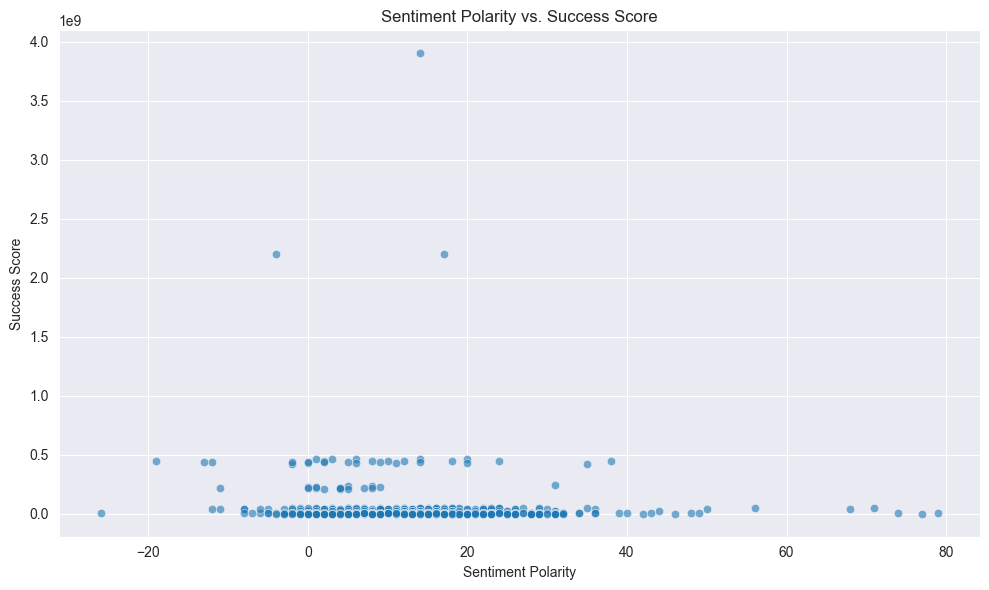

In [59]:
# Scatterplot for Sentiment Polarity vs Success Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Net_Sentiment_Encoded', y='Success_score', alpha=0.6)
plt.title('Sentiment Polarity vs. Success Score')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Success Score')
plt.grid(True)
plt.tight_layout()
plt.show()

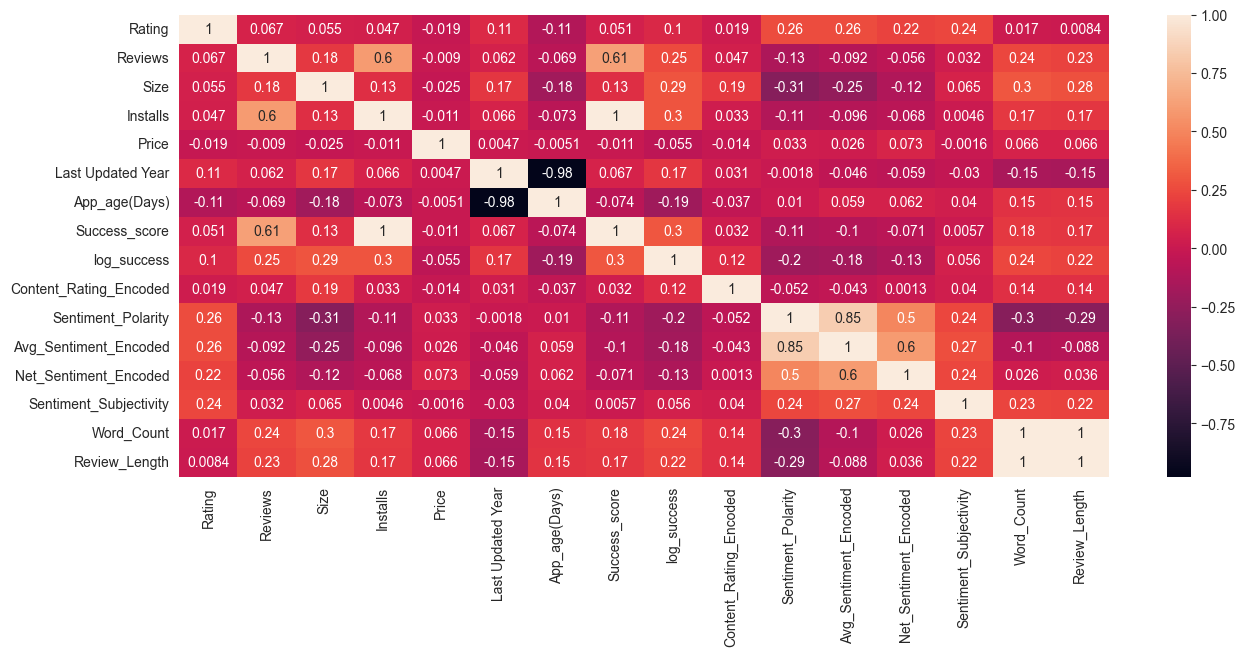

In [60]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)
plt.show()

## Top Apps By Success Score 

In [61]:
top_success_apps = df.sort_values(by='Success_score', ascending=False).head(20)
top_success_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Content_Rating_Encoded,Primary Genre,Secondary Genre,App_Age_Bin,Sentiment_Polarity,Avg_Sentiment_Encoded,Net_Sentiment_Encoded,Sentiment_Subjectivity,Word_Count,Review_Length
1,Subway Surfers,GAME,4.5,27725352.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,...,2,Arcade,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
204,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13.0,1000000000,Free,0.0,Teen,News & Magazines,...,3,News & Magazines,None,6-7 yrs,0.093930,0.350000,14.0,0.501439,36.800000,239.850000
21,SHAREit - Transfer & Share,TOOLS,4.6,7790693.0,17.0,500000000,Free,0.0,Everyone,Tools,...,1,Tools,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
4,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850.0,40.0,500000000,Free,0.0,Teen,Communication,...,3,Communication,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
3,Candy Crush Saga,GAME,4.4,22430188.0,74.0,500000000,Free,0.0,Everyone,Casual,...,1,Casual,None,6-7 yrs,0.031068,-0.100000,-4.0,0.456293,38.250000,229.225000
101,Dropbox,PRODUCTIVITY,4.4,1861310.0,61.0,500000000,Free,0.0,Everyone,Productivity,...,1,Productivity,None,6-7 yrs,0.200016,0.472222,17.0,0.432171,9.861111,59.361111
43,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11.0,500000000,Free,0.0,Everyone,Communication,...,1,Communication,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
9,Pou,GAME,4.3,10486018.0,24.0,500000000,Free,0.0,Everyone,Casual,...,1,Casual,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
335,Samsung Health,HEALTH_AND_FITNESS,4.3,480208.0,70.0,500000000,Free,0.0,Everyone,Health & Fitness,...,1,Health & Fitness,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN
20,Temple Run 2,GAME,4.3,8119154.0,62.0,500000000,Free,0.0,Everyone,Action,...,1,Action,None,6-7 yrs,NaN,NaN,NaN,NaN,NaN,NaN


# Train And Test Model With Joined Data


In [62]:
## Dropped 'Is_Free', 'Last Updated Year', 'Secondary Genre'  due to low importance
X_join = df.drop(columns=['App', 'Success_score', 'Genres', 'Type', "Content Rating", "Last Updated", 'log_success', 'Installs', 'Last Updated Year', 'Secondary Genre', 'App_Age_Bin' ])

for col in X_join.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_join[col] = le.fit_transform(X_join[col])

## Using target: Success score

In [63]:
y = df["Success_score"]

#  Split data into training (80%) and temporary (20%) sets
X_join_train, X_join_temp, y_train, y_join_temp = train_test_split(X_join, y, test_size=0.2, random_state=0)

#  Split temporary set into validation (10%) and test (10%) sets
X_join_valid, X_join_test, y_valid, y_test = train_test_split(X_join_temp, y_join_temp, test_size=0.5, random_state=0)

## XGBoost

In [64]:
xgb_join_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,  # Use a validation set here
    random_state=1
)
xgb_join_model.fit(X_join_train, y_train)

xgb_join_predictions = xgb_join_model.predict(X_join_valid)
xgb_join_mae = mean_absolute_error(y_valid, xgb_join_predictions)
print('XGBoost MAE: ', xgb_join_mae)

XGBoost MAE:  19290319.243576974


## Light GBM

In [65]:
lgb_join_model = lgb.LGBMRegressor(n_estimators=35, random_state=42)
lgb_join_model.fit(X_join_train, y_train)

lgb_join_predictions = lgb_join_model.predict(X_join_valid)
lgb_join_mae = mean_absolute_error(y_valid, lgb_join_predictions)
print('LightGBM MAE: ', lgb_join_mae)

C:\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python\Python311\Lib\subprocess.py", line 1493, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 16
[LightGBM] [Info] Start training from score 19237663.862209
LightGBM MAE:  18714297.955147024


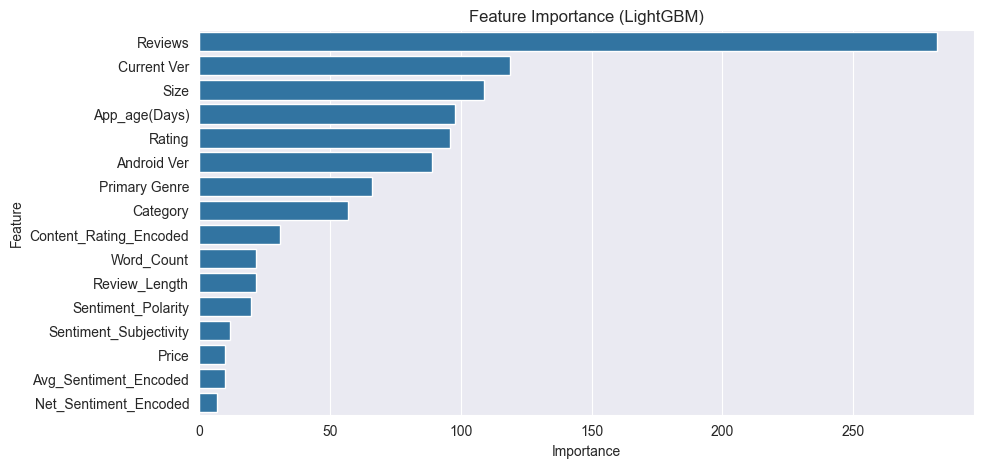

In [66]:
feature_importances = pd.DataFrame({'Feature': X_join_train.columns, 'Importance': lgb_join_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (LightGBM)')
plt.show()

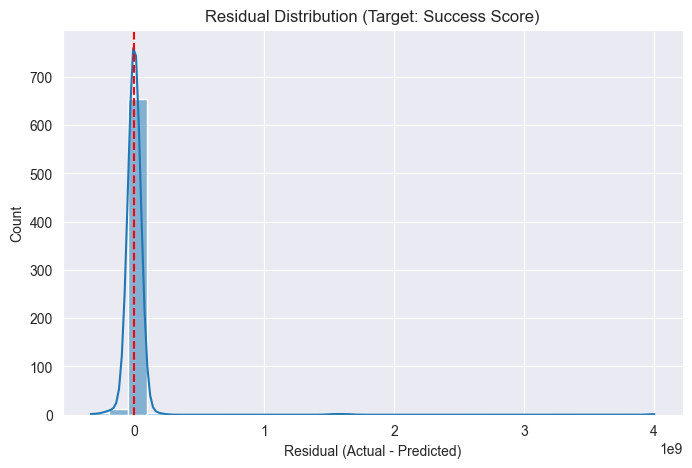

In [67]:
residuals = y_valid - lgb_join_predictions

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution (Target: Success Score)')
plt.show()

## Using target: Log Success

In [68]:
y = df["log_success"]

#  Split data into training (80%) and temporary (20%) sets
X_join_train, X_join_temp, y_train, y_join_temp = train_test_split(X_join, y, test_size=0.2, random_state=0)

#  Split temporary set into validation (10%) and test (10%) sets
X_join_valid, X_join_test, y_valid, y_test = train_test_split(X_join_temp, y_join_temp, test_size=0.5, random_state=0)

## XGBoost 

In [69]:
xgb_join_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,  # Use a validation set here
    random_state=0
)
xgb_join_model.fit(X_join_train, y_train)

xgb_join_predictions = xgb_join_model.predict(X_join_valid)
xgb_join_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(xgb_join_predictions))
print('XGBoost MAE: ', xgb_join_mae)

XGBoost MAE:  17166970.190060206


## Light GBM

In [70]:
lgb_join_model = lgb.LGBMRegressor(n_estimators=50, random_state=1)
lgb_join_model.fit(X_join_train, y_train)

lgb_join_predictions = lgb_join_model.predict(X_join_valid)
lgb_join_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(lgb_join_predictions))
print('LightGBM MAE: ', lgb_join_mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 16
[LightGBM] [Info] Start training from score 12.794863
LightGBM MAE:  16634595.403876157


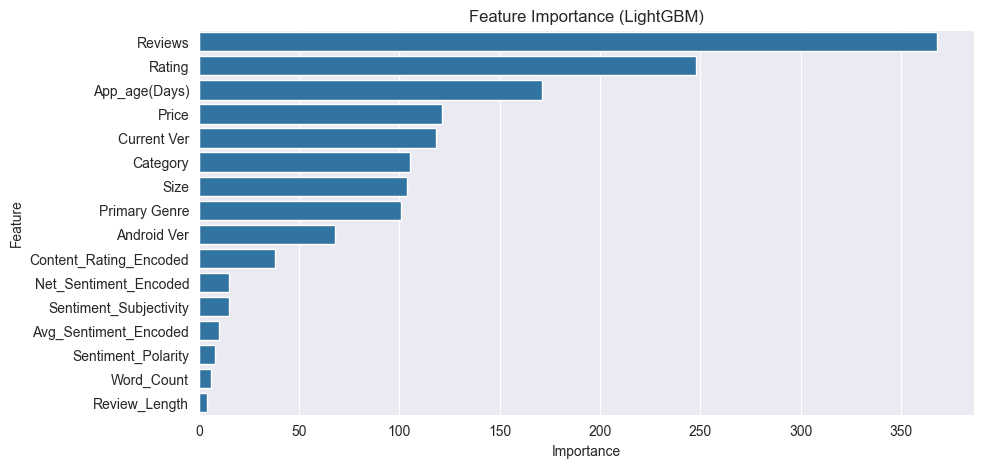

In [71]:
feature_importances = pd.DataFrame({'Feature': X_join_train.columns, 'Importance': lgb_join_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (LightGBM)')
plt.show()

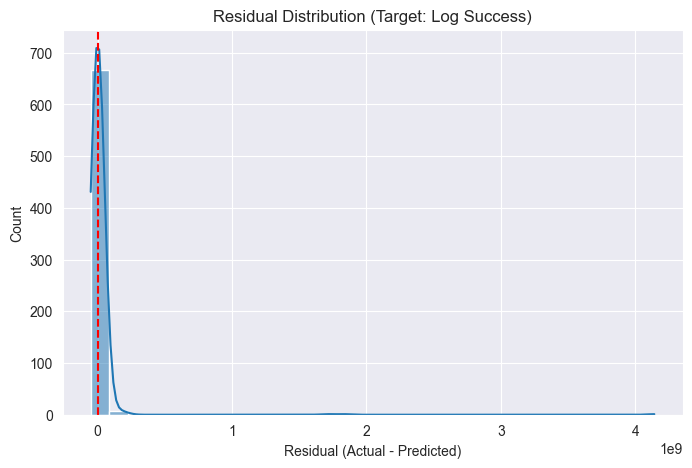

In [72]:
residuals = np.expm1(y_valid) - np.expm1(lgb_join_predictions)

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution (Target: Log Success)')
plt.show()

# Training Model with Apps data Only

In [73]:
# Dropping previously encoded features and highly correlated features (> 0.85) 
# Dropped 'Is_Free', 'Last Updated Year', 'Secondary Genre'  due to low importance
X = apps_df.drop(columns=['App', 'Success_score', 'Genres', 'Type', "Content Rating", "Last Updated", 'log_success', 'Installs', 'Last Updated Year', 'Secondary Genre', 'App_Age_Bin' ])

# Encoding where necessary
for col in X.select_dtypes(include = ['object']).columns:
    le =LabelEncoder()
    X[col] = le.fit_transform(X[col])

## Using target: Success Score

In [74]:
y = apps_df["Success_score"]
    
#  Split data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#  Split temporary set into validation (10%) and test (10%) sets
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Baseline: Linear Regression

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_valid)
lr_mae = mean_absolute_error(y_valid, lr_predictions)
print('Linear Regression MAE: ', lr_mae)
print(f"Mean Success Score: {y_valid.mean()}")
print(f"Standard Deviation: {y_valid.std()}")


Linear Regression MAE:  18863554.776079357
Mean Success Score: 18964882.669128507
Standard Deviation: 102036081.63029301


## Random Forest

In [76]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, rf_predictions)
print('Random Forest MAE: ', rf_mae)

Random Forest MAE:  13218034.691501722


### Feature importance for Random Forest

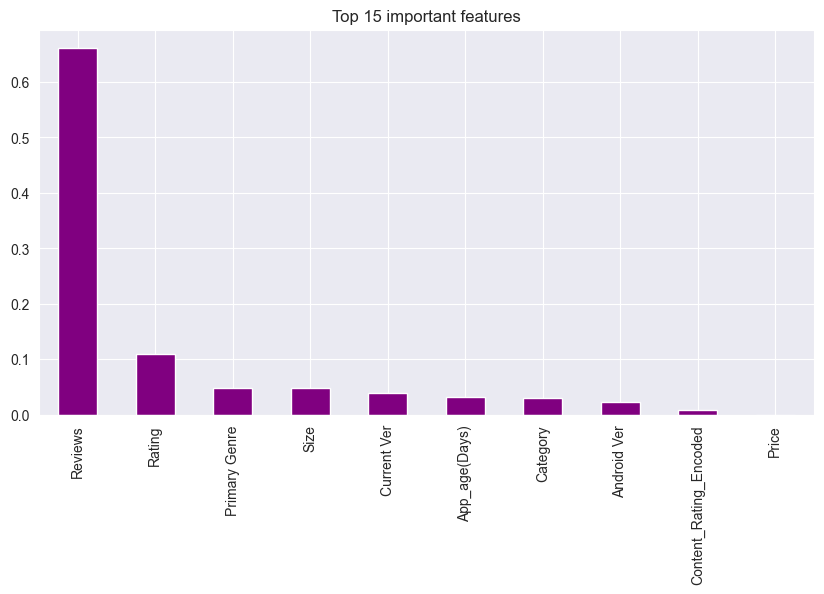

In [77]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
importances.plot(kind='bar', color='purple')
plt.title('Top 15 important features')
plt.show()

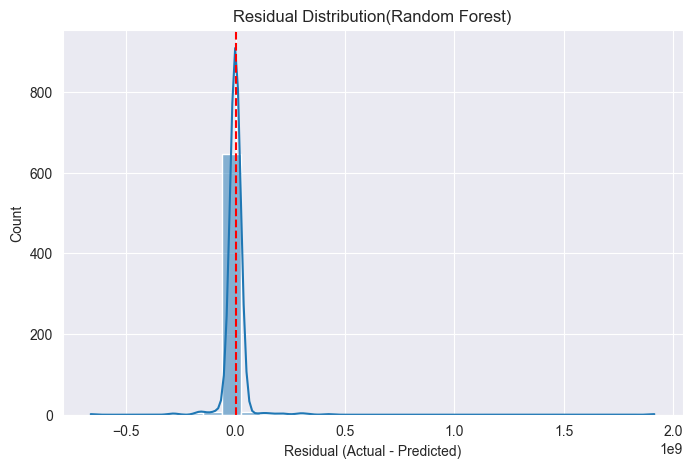

In [78]:
rf_residuals = y_valid - rf_predictions

plt.figure(figsize=(8, 5))
sns.histplot(rf_residuals, bins=30, kde =True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution(Random Forest)')
plt.show()

## Light GBM

In [79]:
lgb_model = lgb.LGBMRegressor(n_estimators=35, random_state=0)
lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_valid)
#lgb_log_predictions = lgb_model.predict(X_valid)
lgb_mae = mean_absolute_error(y_valid, lgb_predictions)
print('LightGBM  MAE: ', lgb_mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 10
[LightGBM] [Info] Start training from score 19705351.771518
LightGBM  MAE:  13382078.368238976


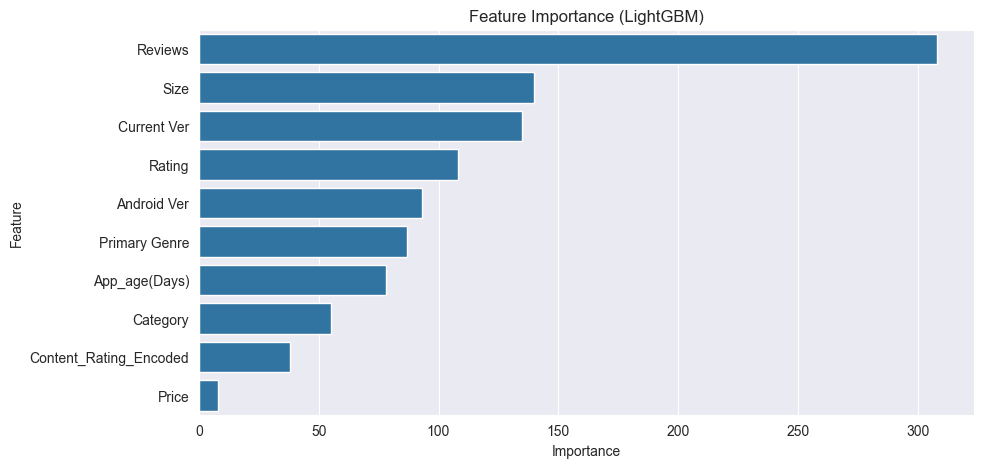

In [80]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (LightGBM)')

plt.show()

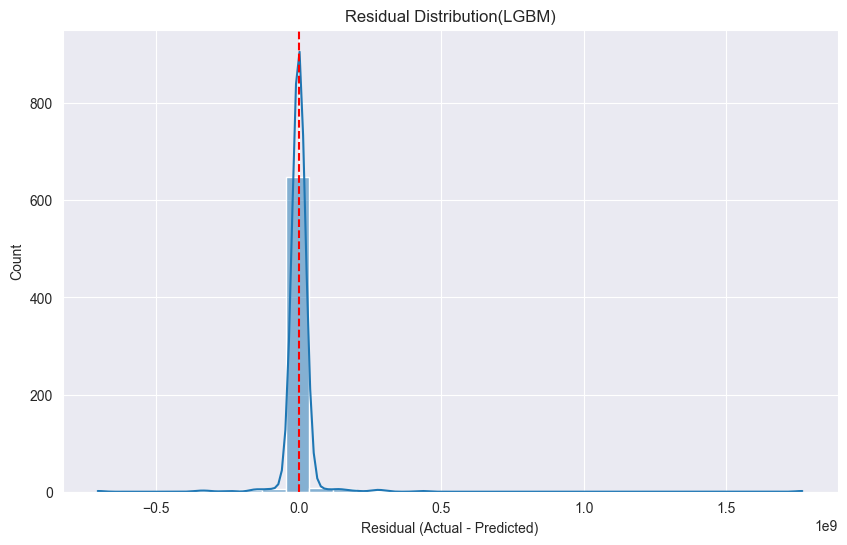

In [81]:
lgb_residuals = y_valid - lgb_predictions

plt.figure(figsize=(10, 6))
sns.histplot(lgb_residuals, bins=30, kde
             =True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution(LGBM)')
plt.show()

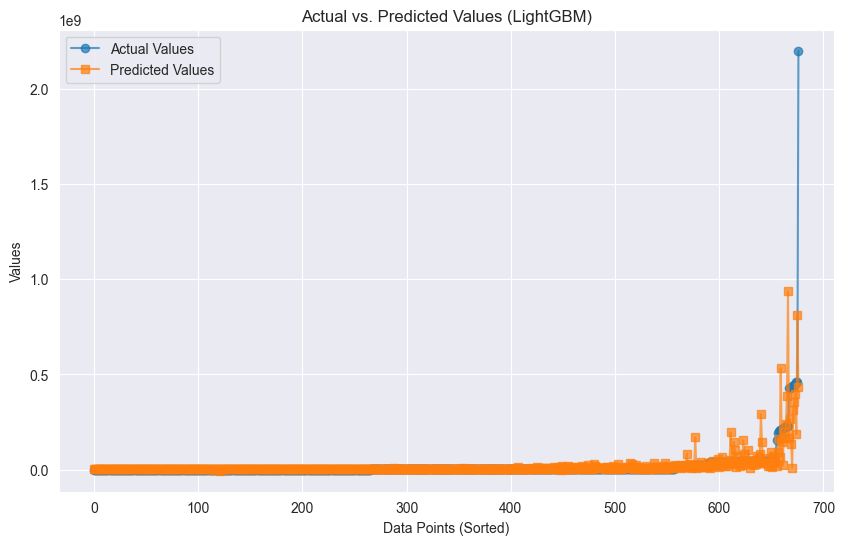

In [82]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_valid)
y_valid_sorted = np.array(y_valid)[sorted_indices]
lgb_predictions_sorted = lgb_predictions[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(y_valid_sorted, label="Actual Values", linestyle="-", marker="o", alpha=0.7)
plt.plot(lgb_predictions_sorted, label="Predicted Values", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Data Points (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (LightGBM)")
plt.legend()
plt.show()

## XGBoost

In [83]:
xgb_model = xgb.XGBRegressor(n_estimators=500,  early_stopping_rounds=5, eval_metric="mae", learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

xgb_predictions = xgb_model.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, xgb_predictions)
print('XGBoost MAE: ', xgb_mae)

[0]	validation_0-mae:28551238.19350
[1]	validation_0-mae:27366273.66913
[2]	validation_0-mae:26345132.40916
[3]	validation_0-mae:25387232.54062
[4]	validation_0-mae:24641722.43575
[5]	validation_0-mae:23834579.07829
[6]	validation_0-mae:23075820.16396
[7]	validation_0-mae:22341100.68242
[8]	validation_0-mae:21711573.55244
[9]	validation_0-mae:21170136.20236
[10]	validation_0-mae:20648651.02068
[11]	validation_0-mae:20289589.31315
[12]	validation_0-mae:19931714.13737
[13]	validation_0-mae:19523533.67504
[14]	validation_0-mae:19105686.01477
[15]	validation_0-mae:18680107.68685
[16]	validation_0-mae:18359802.49631
[17]	validation_0-mae:18140970.40399
[18]	validation_0-mae:17789965.33456
[19]	validation_0-mae:17615098.27031
[20]	validation_0-mae:17320684.34860
[21]	validation_0-mae:17051601.28360
[22]	validation_0-mae:16795248.14993
[23]	validation_0-mae:16655463.60266
[24]	validation_0-mae:16460781.81019
[25]	validation_0-mae:16299995.71492
[26]	validation_0-mae:16211167.83235
[27]	valida

## CatBoost

In [84]:
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_valid)
print("CatBoost MAE:", mean_absolute_error(y_valid, y_pred))

CatBoost MAE: 13984172.387588387


## Cross Validation 

In [85]:
cv_scores = cross_val_score(lgb_model, 
                            X_train, y_train, scoring='neg_mean_absolute_error',  cv=5)

print("Cross-Validation MAE:", -cv_scores.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 4331, number of used features: 10
[LightGBM] [Info] Start training from score 19899192.117525
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 4331, number of used features: 10
[LightGBM] [Info] Start training from score 20687723.815516
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ov

### Final Test (light GBM)

In [86]:
y_pred_lgb = lgb_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred_lgb)
print('LightGBM Final Test MAE: ', final_mae)

LightGBM Final Test MAE:  13756886.909540128


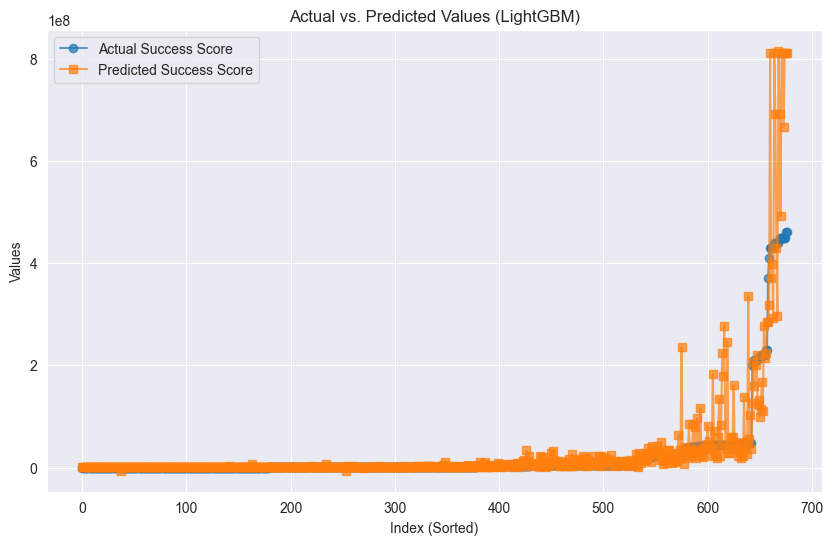

In [87]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
lgb_predictions_sorted = y_pred_lgb[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(y_test_sorted, label="Actual Success Score", linestyle="-", marker="o", alpha=0.7)
plt.plot(lgb_predictions_sorted, label="Predicted Success Score", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Index (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (LightGBM)")
plt.legend()
plt.show()

## Using target: Log Success score

In [88]:
y = apps_df["log_success"]
    
#  Split data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#  Split temporary set into validation (10%) and test (10%) sets
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Baseline: Linear Regression 

In [89]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_valid)
lr_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(lr_predictions))
print('Linear Regression MAE: ', lr_mae)
print(f"Mean Log Success Score: {y_valid.mean()}")
print(f"Standard Deviation: {y_valid.std()}")


Linear Regression MAE:  21606957.38615077
Mean Log Success Score: 12.683175239207694
Standard Deviation: 3.591615427275947


## CatBoost

In [90]:
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_valid)
print("CatBoost MAE:", mean_absolute_error(np.expm1(y_valid), np.expm1(y_pred)))

CatBoost MAE: 10609638.7991123


## Random Forest

In [91]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_valid)
rf_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(rf_predictions))
print('Random Forest MAE: ', rf_mae)

Random Forest MAE:  11561575.086209185


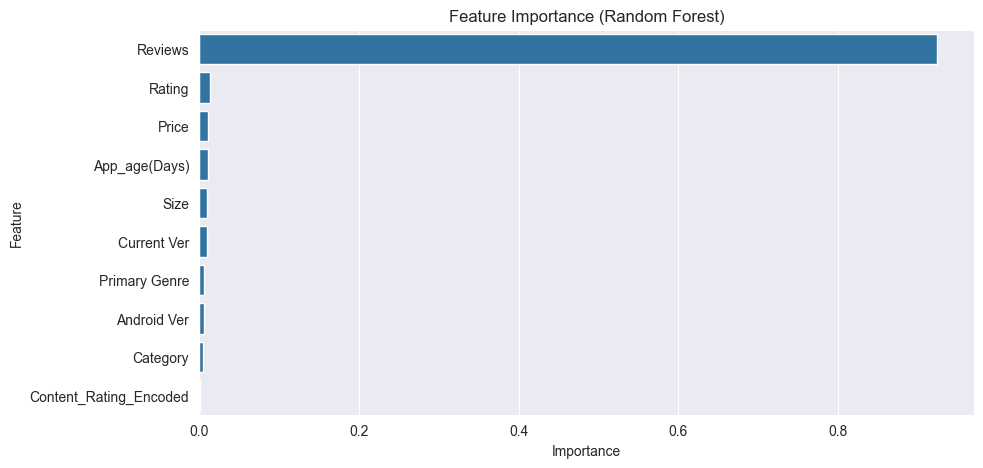

In [92]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (Random Forest)')

plt.show()

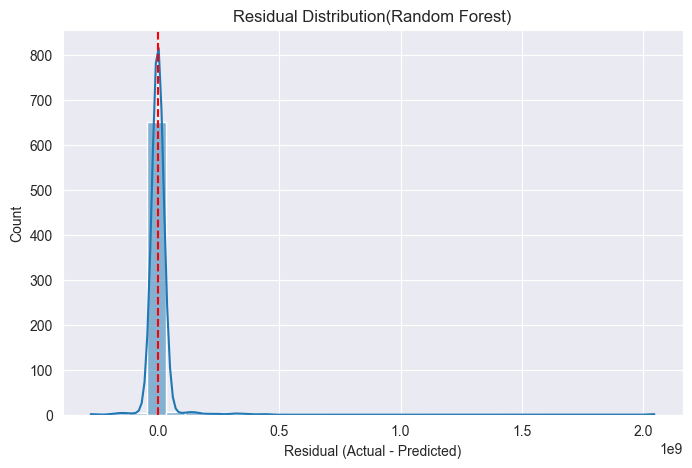

In [93]:
rf_residuals = np.expm1(y_valid) - np.expm1(rf_predictions)

plt.figure(figsize=(8, 5))
sns.histplot(rf_residuals, bins=30, kde
             =True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution(Random Forest)')
plt.show()

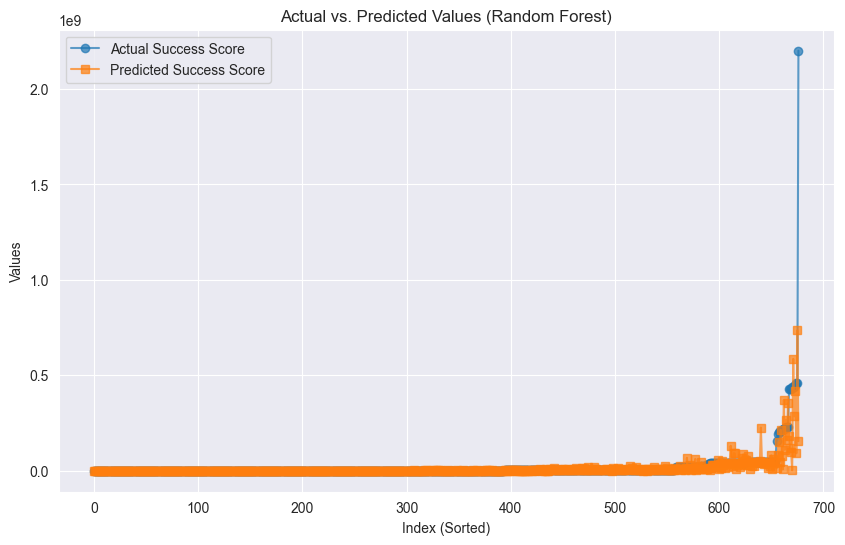

In [94]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_valid)
y_valid_sorted = np.array(y_valid)[sorted_indices]
rf_predictions_sorted = rf_predictions[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(np.expm1(y_valid_sorted), label="Actual Success Score", linestyle="-", marker="o", alpha=0.7)
plt.plot(np.expm1(rf_predictions_sorted), label="Predicted Success Score", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Index (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.legend()
plt.show()

## XGBoost

In [95]:
xgb_model = xgb.XGBRegressor(n_estimators=500,  early_stopping_rounds=5, eval_metric="mae", learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

xgb_predictions = xgb_model.predict(X_valid)
xgb_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(xgb_predictions))
print('XGBoost MAE: ', xgb_mae)

[0]	validation_0-mae:2.84378
[1]	validation_0-mae:2.71098
[2]	validation_0-mae:2.58691
[3]	validation_0-mae:2.46924
[4]	validation_0-mae:2.35848
[5]	validation_0-mae:2.25382
[6]	validation_0-mae:2.15380
[7]	validation_0-mae:2.06011
[8]	validation_0-mae:1.97184
[9]	validation_0-mae:1.88803
[10]	validation_0-mae:1.80836
[11]	validation_0-mae:1.73325
[12]	validation_0-mae:1.66180
[13]	validation_0-mae:1.59404
[14]	validation_0-mae:1.53122
[15]	validation_0-mae:1.47141
[16]	validation_0-mae:1.41583
[17]	validation_0-mae:1.36485
[18]	validation_0-mae:1.31719
[19]	validation_0-mae:1.27371
[20]	validation_0-mae:1.23120
[21]	validation_0-mae:1.19152
[22]	validation_0-mae:1.15506
[23]	validation_0-mae:1.12173
[24]	validation_0-mae:1.08974
[25]	validation_0-mae:1.06049
[26]	validation_0-mae:1.03282
[27]	validation_0-mae:1.00725
[28]	validation_0-mae:0.98385
[29]	validation_0-mae:0.96270
[30]	validation_0-mae:0.94261
[31]	validation_0-mae:0.92448
[32]	validation_0-mae:0.90735
[33]	validation_0-ma

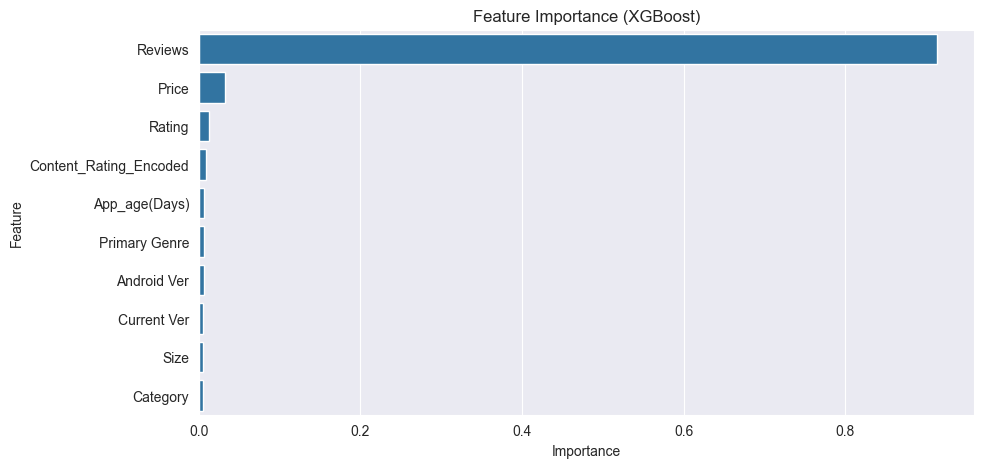

In [96]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (XGBoost)')
plt.show()

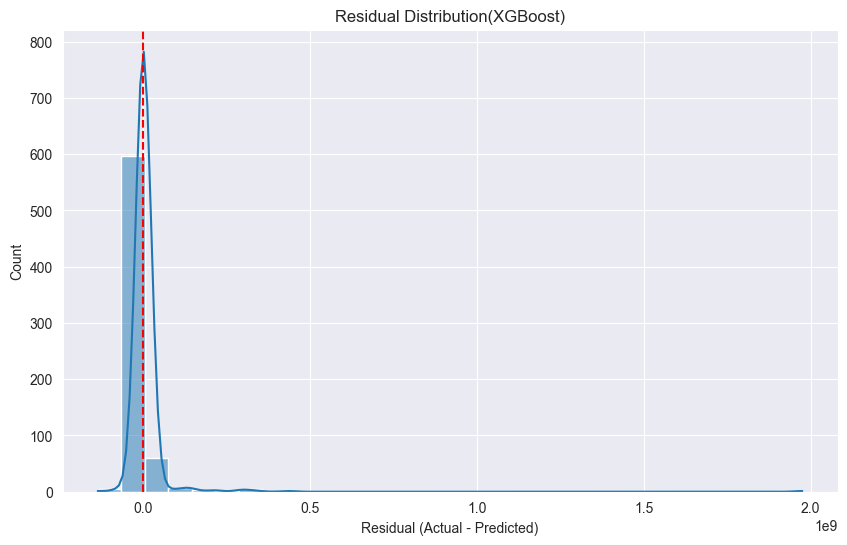

In [97]:
xgb_residuals = np.expm1(y_valid) - np.expm1(xgb_predictions)

plt.figure(figsize=(10, 6))
sns.histplot(xgb_residuals, bins=30, kde
             =True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution(XGBoost)')
plt.show()

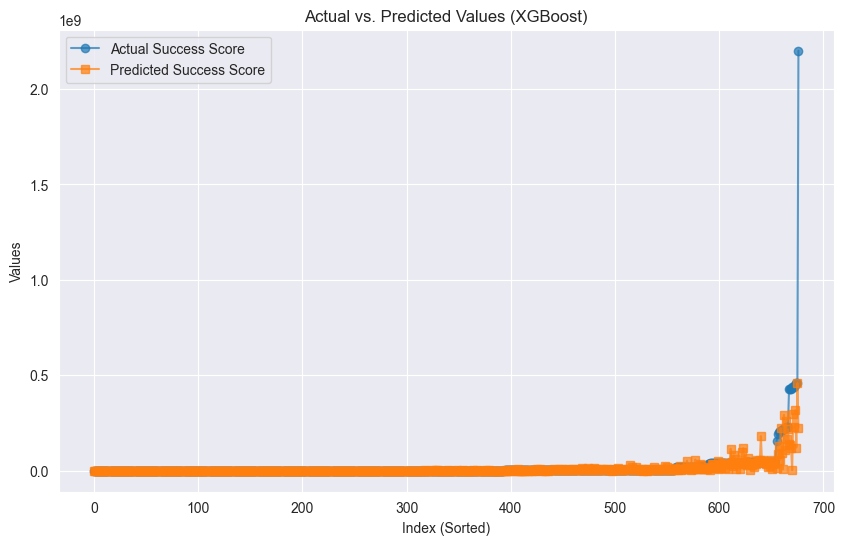

In [98]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_valid)
y_valid_sorted = np.array(y_valid)[sorted_indices]
xgb_predictions_sorted = xgb_predictions[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(np.expm1(y_valid_sorted), label="Actual Success Score", linestyle="-", marker="o", alpha=0.7)
plt.plot(np.expm1(xgb_predictions_sorted), label="Predicted Success Score", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Index (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (XGBoost)")
plt.legend()
plt.show()

## Light GBM

In [99]:
lgb_model = lgb.LGBMRegressor(n_estimators=50, random_state=50)
lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_valid)
lgb_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(lgb_predictions))
print("Light GBM MAE: ", lgb_mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 10
[LightGBM] [Info] Start training from score 12.780337
Light GBM MAE:  11271684.575745387


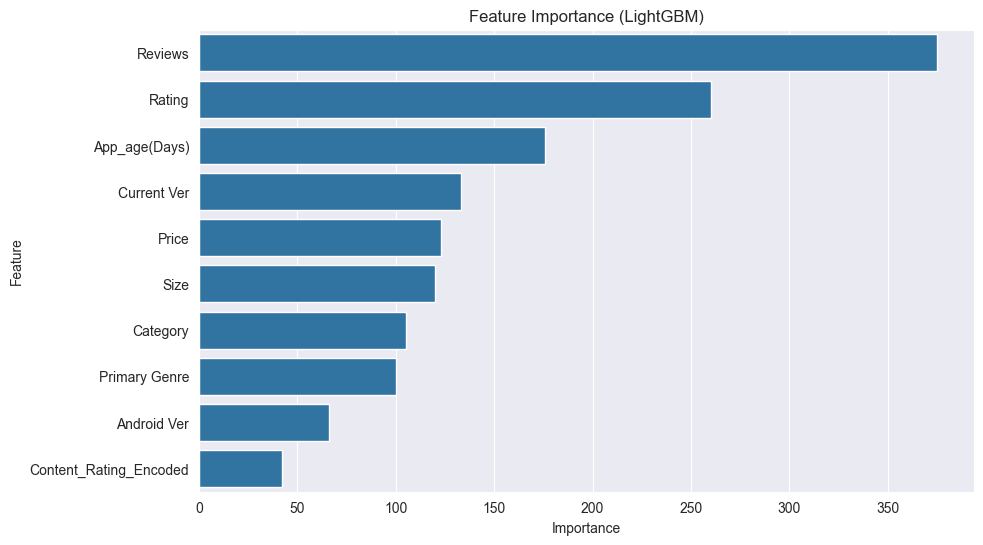

In [100]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance (LightGBM)')
plt.show()

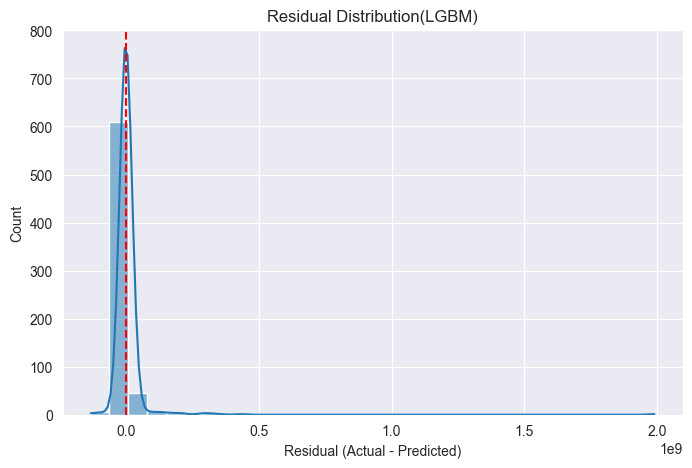

In [101]:
lgb_residuals = np.expm1(y_valid) - np.expm1(lgb_predictions)

plt.figure(figsize=(8, 5))
sns.histplot(lgb_residuals, bins=30, kde
             =True)
plt.axvline(x=0, color='red', linestyle='--')

plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residual Distribution(LGBM)')
plt.show()

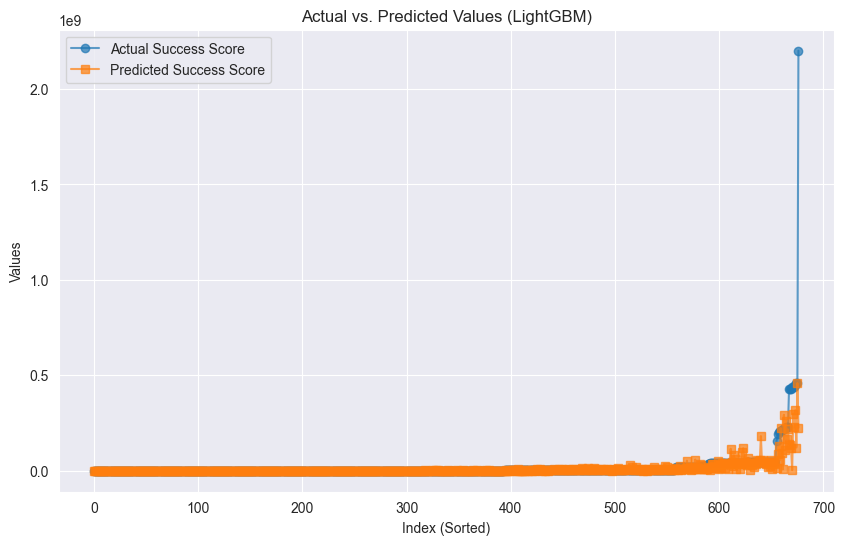

In [102]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_valid)
y_valid_sorted = np.array(y_valid)[sorted_indices]
lgb_predictions_sorted = lgb_predictions[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(np.expm1(y_valid_sorted), label="Actual Success Score", linestyle="-", marker="o", alpha=0.7)
plt.plot(np.expm1(xgb_predictions_sorted), label="Predicted Success Score", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Index (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (LightGBM)")
plt.legend()
plt.show()

## Final Model Test (XGBoost)


In [103]:
y_pred_xgb = xgb_model.predict(X_test)
final_mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_xgb))
print ('Final MAE: ', final_mae)

Final MAE:  8180555.820228041


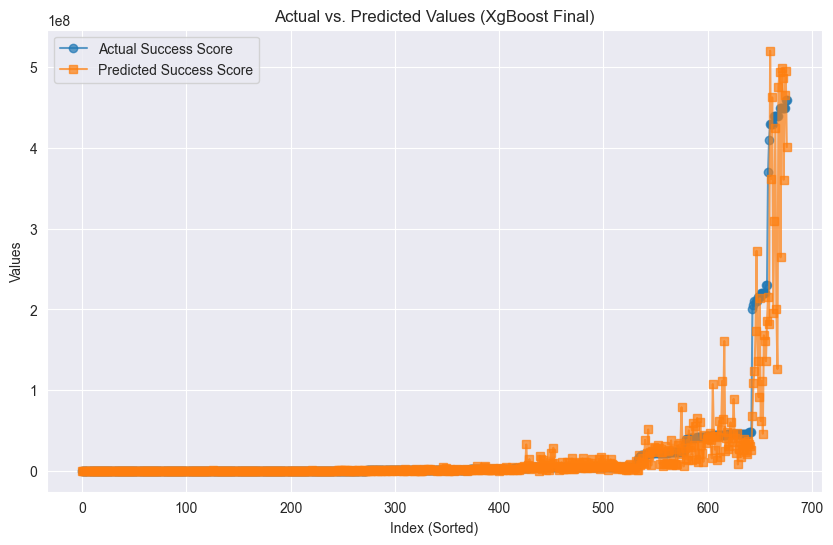

In [104]:
# Sort values to make the line plot meaningful
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
xgb_predictions_sorted = y_pred_xgb[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(np.expm1(y_test_sorted), label="Actual Success Score", linestyle="-", marker="o", alpha=0.7)
plt.plot(np.expm1(xgb_predictions_sorted), label="Predicted Success Score", linestyle="-", marker="s", alpha=0.7)

plt.xlabel("Index (Sorted)")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values (XgBoost Final)")
plt.legend()
plt.show()

### Export Final Dataset

In [105]:
df.to_csv("../data/final_dataset.csv", index=False)

# Conclusion 

## Target Variable

**Orignal:** Success Score (Rating * Number of Installs)  
**Final:** Log Success

## Insights

**App Category And Genre**  
The apps in certain categories and genres tend to have high success scores. They also helps to predict the success score as they are included in the important features

**Top 10 Categories**

In [106]:
category_avg_success.head(10).astype('int64')

Category
GAME                  60028268
COMMUNICATION         47713219
ENTERTAINMENT         43909517
VIDEO_PLAYERS         34196490
PHOTOGRAPHY           32421441
NEWS_AND_MAGAZINES    31019365
PRODUCTIVITY          27508856
TOOLS                 22234631
SHOPPING              21877745
HEALTH_AND_FITNESS    17579248
Name: Success_score, dtype: int64

**Top 10 Genres**

In [107]:
genre_avg_success.head(10).astype('int64')

Primary Genre
Arcade                     85920169
Racing                     61657238
Casual                     51758266
Communication              47713219
Action                     46470397
Strategy                   41631026
Puzzle                     35160069
Video Players & Editors    34067431
Photography                32421441
News & Magazines           31019365
Name: Success_score, dtype: int64

**Skewness Of Success Metrics**  
The success scores are shown to be positively skewed. This implies that only a few apps attain very high success while most apps attain relatively moderate success.  
Due to this the log scale was used to normalize the data and also to improve predictive performance.

**App Prices**  
It was also shown that price contributes to the success of an app. Given most apps were free, it implies that free apps tend to perform better in terms of installs.    

**Content Rating**  
It has been shown that apps targeted toward wider age groups(e.g Everyone, Everyone 10+) tend to attract more users

**Reviews Dataset**  
Sentiment Polarity, Review lenght and Word count have a minor positive correlation to the success matrices.  
Apps with positive sentiments and longer reviews tend to have higher success scores 

## Modeling

**Comparism of Joined and Non-Joined Data**  
During the model building process two data sets were experiment with  
- **df:** apps dataset + reviews dataset  
- **apps_df:** apps dataset only
  
**Results**: The models trained with apps_df consistently outperformed those trained with the joined dataset. This is due to the following reasons:  
- Joining the datasets introduced a lot of null values and noise. Removing all null values would significantly reduce the size of the dataset and imputation may be misleading.
- Aggregation of sentiments from reviews dataset may have oversimplified the data  

**Comparism of Success Matrices**  
The following matrices where experimented with and compared 
- **Success Score:** Installs * Rating
- **Log Success:** the log of success score

**Results:** Models trained with Log Success consistently outperformed those trained with Success Score. This is due these reasons:
- Success score was heavily skewed hence the models did not perform well against high values.
- Log success reduced the skewness and stabilized the variance hence when the MAE was back transformed the resulting MAE was lower.
- Residuals for models trained with Log Success were more centered indicating better generalization and accuracy. 

**Models Used**
- Baseline: Linear Regression
- Random Forest Regressor
- XGBoost Regressor
- CatBoost Regressor
- Light GBM Regressor

## Overall Takeaway

**Best Model:** XGBoost Regressor trained on apps_df with Log Success as target.  

**Performance**
- Provided the best Mean Absolute Error when back transformed: **10.7M**, better against validation set as compared to  **13.4M** when Success Score is used.
- Performed well against extremely high values.

**Important Features**
- Number of Reviews
- Rating
- Price
- Category
- App Age(Days)
- Size
- Primary Genre
- Content Rating
- Current Version
  
Though the reviews dataset was helpful, it however introduced complexity without improving accuracy.  
Log Transformation generally improved model performance and interpretability.